# Global Power Plant Database Project

In [1]:
from IPython.display import Image
Image(url= "https://www.ski-gmbh.com/files/Bilder/Ref-Bilder/Ref-kraftwerk.jpg")

# 1. Introduction

#### Electricity powers modern society. Despite its importance,information about actual electricity generation by power plants is often closely held by plant and system operatorsand difficult for others to access. 
#### Power plant capacity, usually measured in megawatts(MW), describes a facility’s maximum electric power rate.If a 100 MW plant runs at its maximum capacity for onehour, it will generate 100 megawatt-hours of electricity.
#### In other words, capacity measures the size of the plantand its potential generation rate, while generationdescribes the actual electricity output of the plant overa period of time.Thermal plants use several inputs to produce electricity,including fuel to start and run their turbines and water tocool the plants. In addition to electricity, outputs typically include (warmer) water sent back to a water body and steam that evaporates, plus pollutants to air, water, and soil. Energy planners can use geo-located historical plantgeneration to both monitor emissions and evaluate howbest to meet changes in electricity demand over time.
#### How often and how intensely a power plant runs varies across plant types. Annual power plant generation can be estimated using methodologies that are based on electricity grid optimization (also known as optimal dispatch) or statistical models.
#### Grid optimization models consider each power plant, its technical characteristics, and the cost of input fuels, and dispatch the simulated plants to minimize the total cost ofgeneration subject to the following:
#### 1. Meeting the quantity of electricity demanded in everyperiod
#### 2. Meeting any technical constraints, such as minimumdown times or maximum ramp rates
#### 3. Accounting for the transmission and distributionconstraints (if modeled)
#### These models approximate plant-level generation by estimating “optimal generation,” though they do not necessarily reflect actual historical generation, which mayhave been produced “nonoptimally.” To produce highquality results, optimal dispatch models can be computationally intensive and require detailed information onavailable globally.
#### Statistical models use information on power plants withreported annual generation to estimate the correlationbetween annual generation and plant characteristics suchas capacity, fuel type, and commissioning year. Theseestimated correlations are then applied to the characteristics of plants without reported generation to create theirestimated yearly generation. In contrast to a dispatchmodel, a statistical model estimates generation based ona power plant’s similarity to plants with reported generation, not based on a system optimization.
#### In our approach, statistical models with machine learning techniques are used to estimate annual plant generation as accurately as possible. Machine learning algorithmscapture correlations between generation, technical characteristics, and system variables.


# 2.Dataset Information

#### Because they supply power only occasionally, the power supplied by a peaker power plant commands a much higher price per kilowatt hour than power from a power grid's base power plants. A peaker plant may operate many hours a day, or it may operate only a few hours per year, depending on the condition of the region's electrical grid. Because of the cost of building an efficient power plant, if a peaker plant is only going to be run for a short or highly variable time it does not make economic sense to make it as efficient as a base load power plant. In addition, the equipment and fuels used in base load plants are often unsuitable for use in peaker plants because the fluctuating conditions would severely strain the equipment.

#### The power output of a peaker power plant varies depending on environmental conditions, so the business problem is predicting the power output of a peaker power plant as a function of the environmental conditions -- since this would enable the grid operator to make economic tradeoffs about the number of peaker plants to turn on (or whether to buy expensive power from another grid).

#### This data is for the purpose of predicting the power plant details of cunsumption Electricity by Global Poer Plant of India Dataset

# 3.Description about the Data Columns

### Global Pwer Plant has these Data Columns:
 1)    country                    
 2)  country_long              
 3)   name                     
 4)   gppd_idnr               
 5)  capacity_mw               
 6)  latitude                  
 7)   longitude                
 8)   primary_fuel              
 9)  other_fuel1                
10)   other_fuel2               
11)  other_fuel3               
12)  commissioning_year        
13)  owner                      
14)  source                    
15)  url                       
16)  geolocation_source         
17)  wepp_id                   
18)  year_of_capacity_data     
19)  generation_gwh_2013       
20)  generation_gwh_2014       
21)  generation_gwh_2015       
22)  generation_gwh_2016       
23)  generation_gwh_2017       
24)  generation_data_source     
25)  estimated_generation_gwh

### In this Dataset I have to both Classification & Regression Model.
### First is Primary Fuel - Classification Model And Second is capacity_mw which is regression model.

# 4.Importing All Necessary libraries

In [2]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\sunil gupta\anaconda3\lib\site-packages (1.0)


#### Installing the Sci-kit learn by using pip install

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# preprocession, normalizing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.decomposition import PCA
from sklearn import metrics

# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# models

from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,roc_curve, roc_auc_score

# preprocessing and normalizing
from sklearn.preprocessing import LabelEncoder

# metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



lr = LogisticRegression(random_state = 6)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state = 6)
dt = DecisionTreeClassifier(random_state = 6)


import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


#### By Importing above All Necessary Libraries I got the idea of implementing all the Libraries in one go for better model Prediction in this dataset.

# 5.Loading csv data

In [4]:
# Reading the dataset

df = pd.read_csv('database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


#### Here I am loading the data set into a variable i.e. “df” and processing the first 5 rows.
#### After Reading the csv file I find out that primary_fuel, capacity_mw are label columns while remaning are the Features columns.

# 6.EDA - Exploratory Data Analysis

##### In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.
##### EDA which focuses more narrowly on checking assumptions required for model fitting and hypothesis testing, and handling missing values and making transformations of variables as needed.

In [5]:
df.shape

(908, 25)

##### By using shape I got 908 rows and 25 columns

In [6]:
# lets find out is there any null value in any columns

pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

#### Also, most of the column are object and float in nature.

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.shape

(908, 25)

#### After using dupllicates I can see there is no duplicate value in this dataset.

In [9]:
df.nunique()

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

#### By Using nunique I got an idea of continuous & Categorical Columns.
#### As in this Dataset most of the columns are continuous to predict Global PowerPlant Dataset Of India.

In [10]:
df.describe(include='all')

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
count,908,908,908,908,908.000000,862.000000,862.000000,908,199,1,...,889,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,450,0.0
unique,1,1,908,908,NaN,NaN,NaN,8,3,1,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,IND,India,Dhursar,IND0000257,NaN,NaN,NaN,Coal,Oil,Oil,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central Electricity Authority,NaN
freq,908,908,1,1,NaN,NaN,NaN,259,196,1,...,766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450,NaN
mean,NaN,NaN,NaN,NaN,321.046378,21.196189,77.447848,NaN,NaN,NaN,...,NaN,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN,NaN
std,NaN,NaN,NaN,NaN,580.221767,6.248627,4.907260,NaN,NaN,NaN,...,NaN,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,8.168900,68.644700,NaN,NaN,NaN,...,NaN,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,16.837500,16.771575,74.258975,NaN,NaN,NaN,...,NaN,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN,NaN
50%,NaN,NaN,NaN,NaN,60.000000,21.778300,76.719250,NaN,NaN,NaN,...,NaN,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN,NaN
75%,NaN,NaN,NaN,NaN,388.125000,25.516375,79.441475,NaN,NaN,NaN,...,NaN,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN,NaN


#### From the Above statistics data show that their multiple outliers mostly in many columns.
#### There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction.
#### a) Also, number of rows in each column are not same, means there is null values present in the data set.
#### b) Also, the mean and 50%value of most of the column are same and the STD and mean have a major difference to each other.
#### c) Most of the column statistics data are near to 0 values.
#### d) By checking the difference between the 75% and max value there are outliers in some of the column, I will check it soon.

In [11]:
# dropping unwanted column
df.drop('country',inplace=True,axis=1)
df.drop('wepp_id',inplace=True,axis=1)
df.drop('other_fuel3',inplace=True,axis=1)
df.drop('estimated_generation_gwh',inplace=True,axis=1)
df.drop('other_fuel2',inplace=True,axis=1)
df.drop('gppd_idnr',inplace=True,axis=1)
df.drop('country_long',inplace=True,axis=1)
df.drop('url',inplace=True,axis=1)

In [12]:
df.shape

(908, 17)

In [13]:
df.describe(include='all')

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
count,908,908.000000,862.000000,862.000000,908,199,528.000000,342,908,889,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,450
unique,908,NaN,NaN,NaN,8,3,NaN,280,191,3,NaN,NaN,NaN,NaN,NaN,NaN,1
top,Dhursar,NaN,NaN,NaN,Coal,Oil,NaN,Sterling Agro Industries ltd.,Central Electricity Authority,WRI,NaN,NaN,NaN,NaN,NaN,NaN,Central Electricity Authority
freq,1,NaN,NaN,NaN,259,196,NaN,4,520,766,NaN,NaN,NaN,NaN,NaN,NaN,450
mean,NaN,321.046378,21.196189,77.447848,NaN,NaN,1996.876894,NaN,NaN,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,NaN,580.221767,6.248627,4.907260,NaN,NaN,17.047817,NaN,NaN,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,NaN,0.000000,8.168900,68.644700,NaN,NaN,1927.000000,NaN,NaN,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,16.837500,16.771575,74.258975,NaN,NaN,1988.000000,NaN,NaN,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,NaN,60.000000,21.778300,76.719250,NaN,NaN,2000.000000,NaN,NaN,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,NaN,388.125000,25.516375,79.441475,NaN,NaN,2011.250000,NaN,NaN,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN


#### Dropping the unwanted Columns after which I got shape of the dataset is  908 rows & 17 columns.

In [14]:
df.isnull().sum()

name                        0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     566
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

# Filling Missing Values

In [16]:
# filling the missing values of continious columns
df['latitude'].fillna(df['latitude'].mean(),inplace=True)
df['longitude'].fillna(df['longitude'].mean(),inplace=True)
df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mean(),inplace=True)
df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean(),inplace=True)
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean(),inplace=True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean(),inplace=True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean(),inplace=True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean(),inplace=True)

# filling the missing values of categorical columns
df['commissioning_year'].fillna(df['commissioning_year'].mode()[0],inplace=True)
df['other_fuel1'].fillna(df['other_fuel1'].mode()[0],inplace=True)
df['generation_data_source'].fillna(df['generation_data_source'].mode()[0],inplace=True)
df['owner'].fillna(df['owner'].mode()[0],inplace=True)
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0],inplace=True)

In [17]:
df.isnull().sum()

name                      0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

In [18]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,Oil,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Oil,2013.0,Ultratech Cement ltd,Ultratech Cement ltd,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,Oil,2013.0,AES,CDM,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Oil,2004.0,Acc Acc ltd,Central Electricity Authority,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Acc Acc ltd,Central Electricity Authority,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority


#### After using Fillna in most of the continuous columns By takin mean it has been filled all the Missing Values and the count of the Dataset is matching.

# 7.Data Visualizations

## Data visualization
##### Data visualization is the process of translating large data sets and metrics into charts, graphs and other visuals. The resulting visual representation of data makes it easier to identify and share real-time trends, outliers, and new insights about the information represented in the data.Data visualization gives us a clear idea of what the information means by giving it visual context through maps or graphs. This makes the data more natural for the human mind to comprehend and therefore makes it easier to identify trends, patterns, and outliers within large data sets.

##### According to my perception I have done below Data visualization in this Project.

#### Strip Plot
##### A strip plot is a graphical data anlysis technique for summarizing a univariate data set.A strip chart is handy when taking a look at a small set of one-dimensional data. It shows all the data, and since there aren't too many points cluttering the plot, it is informative.A strip is basically a scatter plot where the x axis represents a categorical variable While Y represents Label Column of the Dataset.
#### Cat Plot
##### Catplot shows frequencies of the categories of one, two or three categorical variables.This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representation
#### Histogram Plot
##### To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable.The bins (intervals) must be adjacent and are often (but not required to be) of equal size. If the bins are of equal size, a rectangle is erected over the bin with height proportional to the frequency—the number of cases in each bin. A histogram may also be normalized to display "relative" frequencies. It then shows the proportion of cases that fall into each of several categories, with the sum of the heights equaling 1.
#### Distribution Plot
##### A distribution plot displays a distribution and range of a set of numeric values plotted against a dimension. ... In a distribution chart, ideally, two dimensions and one measure are used. If so, you will get the individual line of range and distribution.

## Handling Categorical Columns

### primary_fuel

In [92]:
df['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

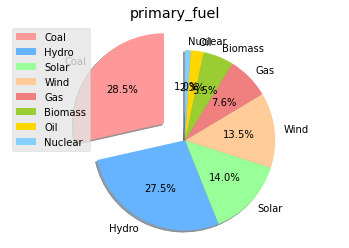

In [93]:
#  pie plot of primary_fuel 

labels = ['Coal', 'Hydro', 'Solar', 'Wind', 'Gas', 'Biomass', 'Oil', 'Nuclear']
value = [259, 250, 127, 123, 69, 50, 21, 9]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','lightcoral','yellowgreen','gold','lightskyblue']
explode = [0.3,0,0,0,0,0,0,0]# 

plt.style.use('ggplot')
plt.title('primary_fuel')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

#### From the above countplot I can say 'primary_fuel' uses Coal(259) capacity more rather than the remaining ones for Global Power Plant.

##### other_fuel1 vs primary_fuel

In [94]:
df['other_fuel1'].value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

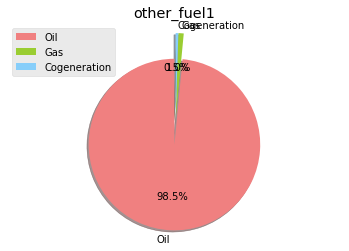

In [95]:
#  pie plot of other_fuel1 

labels = ['Oil', 'Gas', 'Cogeneration']
value = [196, 2, 1]
colors = ['lightcoral','yellowgreen','lightskyblue']
explode = [0.3,0,0,]# 

plt.style.use('ggplot')
plt.title('other_fuel1')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

<AxesSubplot:xlabel='other_fuel1', ylabel='primary_fuel'>

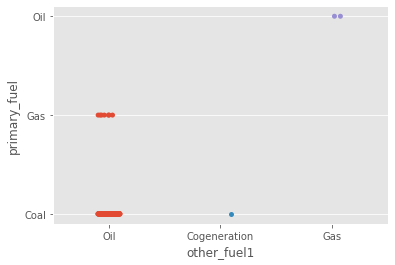

In [96]:
sns.stripplot(df['other_fuel1'],df['primary_fuel'])

#### According to my plots and charts of other_fuel1 i can see Oil is the main necessity god for Global Power Plant.

#### geolocation_source vs primary_fuel

In [55]:
df['geolocation_source'].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

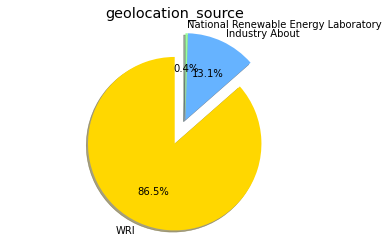

In [60]:
#  pie plot of geolocation_source 

labels = ['WRI', 'Industry About', 'National Renewable Energy Laboratory']
value = [786, 119, 4]
colors = ['gold','#66b3ff','#99ff99']
explode = [0.3,0,0,]# 

plt.style.use('ggplot')
plt.title('geolocation_source')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<AxesSubplot:xlabel='geolocation_source', ylabel='primary_fuel'>

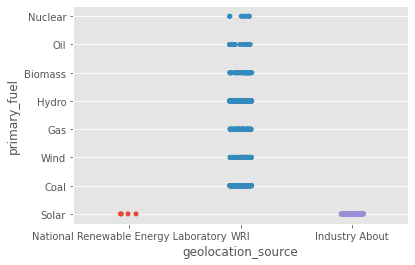

In [97]:
sns.stripplot(df['geolocation_source'],df['primary_fuel'])

#### Geolocation_source  plot and graphs shows "WRI" containg 786 values in this diagram which will have major effect in Global Power Plant.

#### year_of_capacity_data vs primary_fuel

In [63]:
df['year_of_capacity_data'].value_counts()

2018.0    520
Name: year_of_capacity_data, dtype: int64

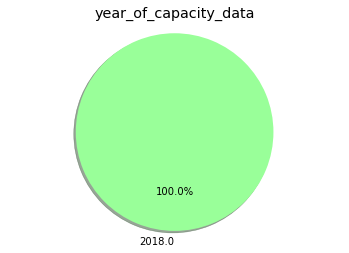

In [64]:
#  pie plot of year_of_capacity_data 

labels = ['2018.0']
value = [520]
colors = ['#99ff99']
explode = [0]# 

plt.style.use('ggplot')
plt.title('year_of_capacity_data')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<AxesSubplot:xlabel='year_of_capacity_data', ylabel='primary_fuel'>

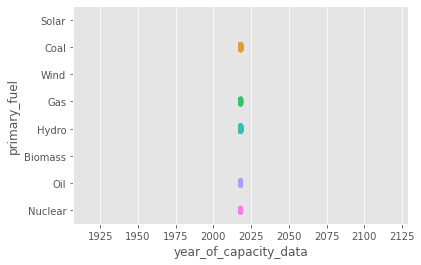

In [98]:
sns.stripplot(df['year_of_capacity_data'],df['primary_fuel'])

#### In this Global Power Plant Project it shows that Year-2018 plays a vital role by using coal as major commodity for Generating Electricity.

#### generation_data_source vs primary_fuel

In [66]:
df['generation_data_source'].value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

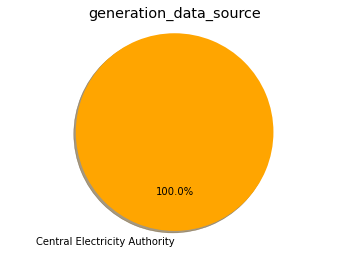

In [67]:
#  pie plot of generation_data_source 

labels = ['Central Electricity Authority']
value = [450]
colors = ['orange']
explode = [0]# 

plt.style.use('ggplot')
plt.title('generation_data_source')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<AxesSubplot:xlabel='generation_data_source', ylabel='primary_fuel'>

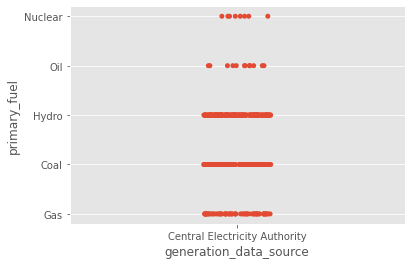

In [99]:
sns.stripplot(df['generation_data_source'],df['primary_fuel'])

##### Generation_data_source  plot shows "Central Electricity Authority" containg 450 values in this diagram which shows Central Electricity Authorityhas a major role in Global Power Plant.

# generation_gwh_2013

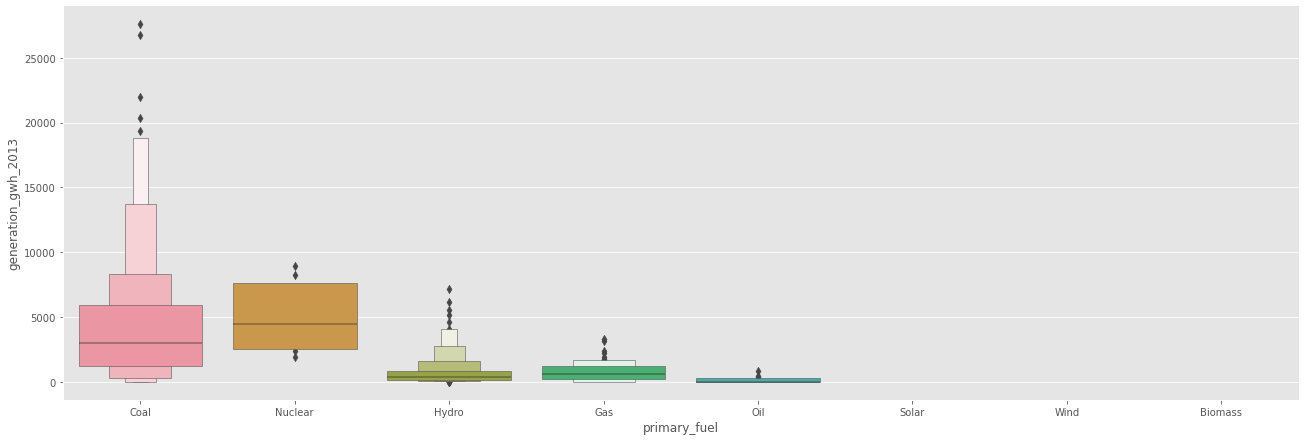

In [72]:
# generation_gwh_2013 vs primary_fuel
sns.catplot(y = "generation_gwh_2013", x = "primary_fuel", data = df.sort_values("generation_gwh_2013", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='primary_fuel'>

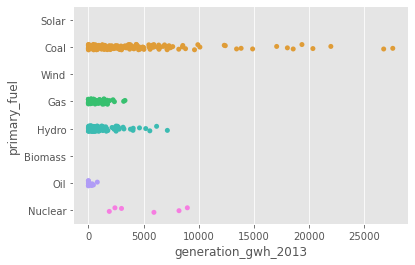

In [101]:
sns.stripplot(df['generation_gwh_2013'],df['primary_fuel'])

#### generation_gwh_2013 plots shows coal is widely used in generating electricity rather than others.

# generation_gwh_2014

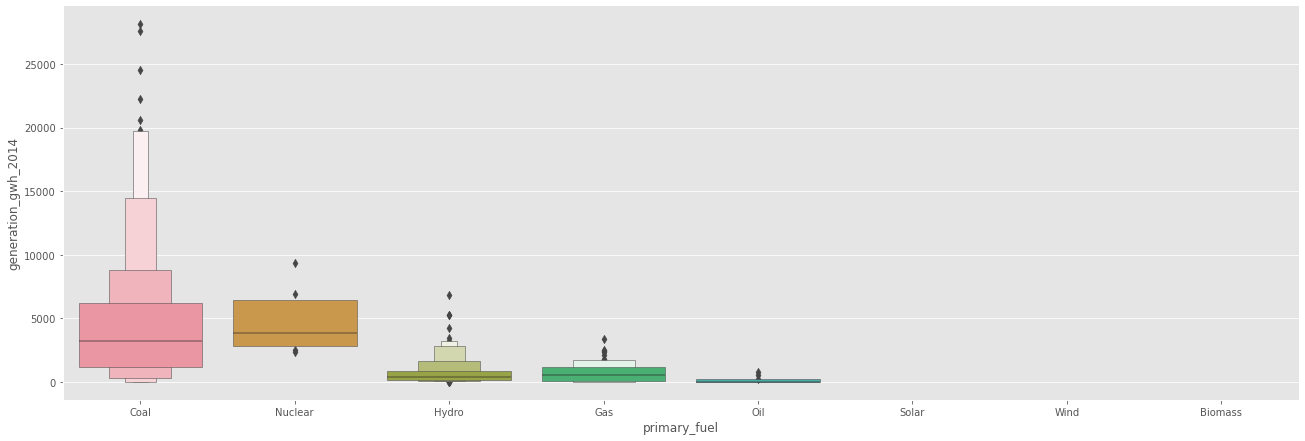

In [74]:
# generation_gwh_2014 vs primary_fuel
sns.catplot(y = "generation_gwh_2014", x = "primary_fuel", data = df.sort_values("generation_gwh_2014", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='primary_fuel'>

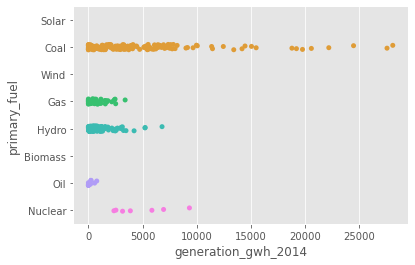

In [102]:
sns.stripplot(df['generation_gwh_2014'],df['primary_fuel'])

#### generation_gwh_2014 plots shows coal is widely used in generating electricity rather than others.

# generation_gwh_2015

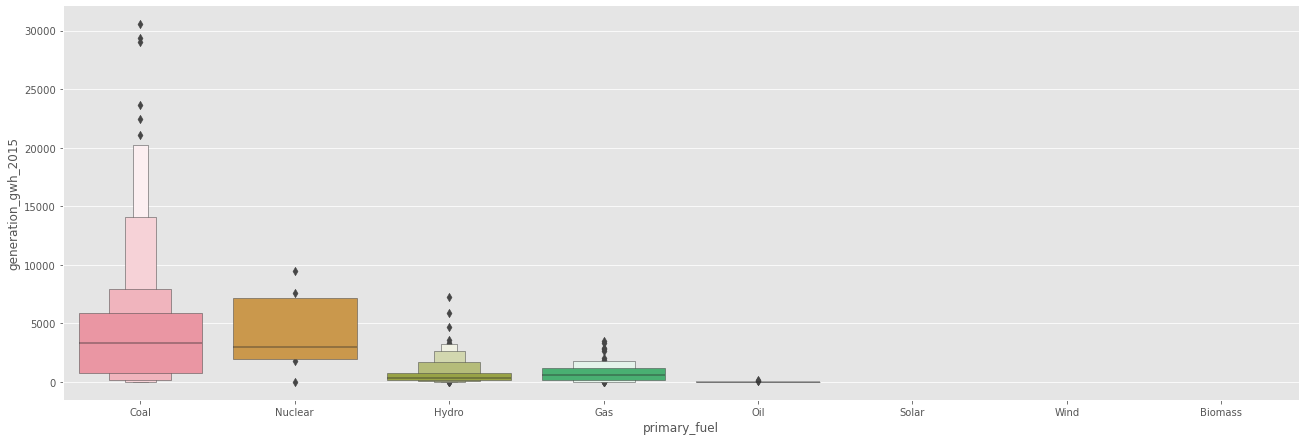

In [75]:
# generation_gwh_2014 vs primary_fuel
sns.catplot(y = "generation_gwh_2015", x = "primary_fuel", data = df.sort_values("generation_gwh_2015", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='primary_fuel'>

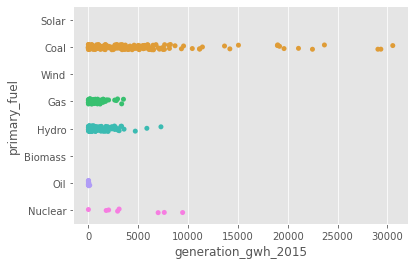

In [103]:
sns.stripplot(df['generation_gwh_2015'],df['primary_fuel'])

#### generation_gwh_2015 plots shows coal is widely used in generating electricity rather than others.

# generation_gwh_2016

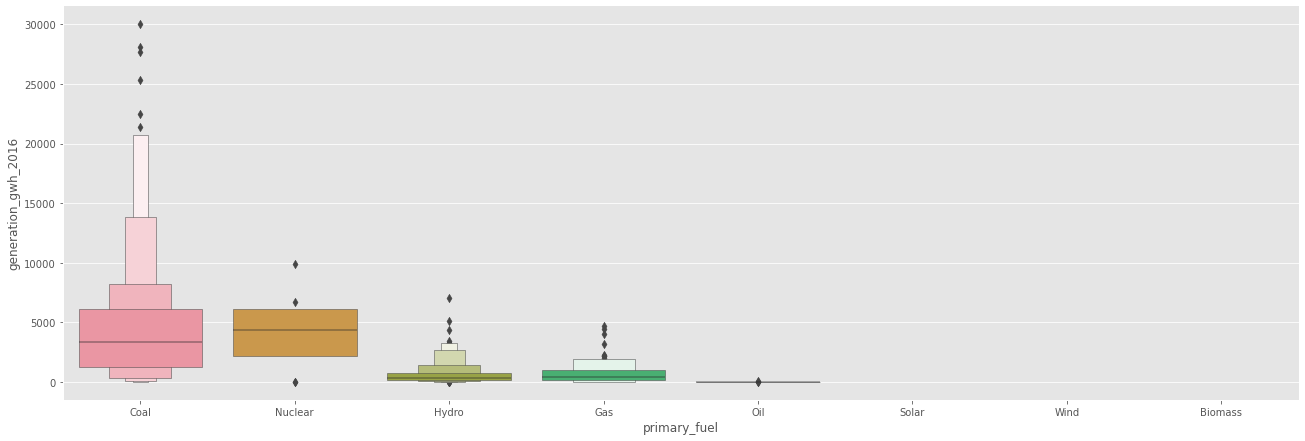

In [76]:
# generation_gwh_2014 vs primary_fuel
sns.catplot(y = "generation_gwh_2016", x = "primary_fuel", data = df.sort_values("generation_gwh_2016", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='primary_fuel'>

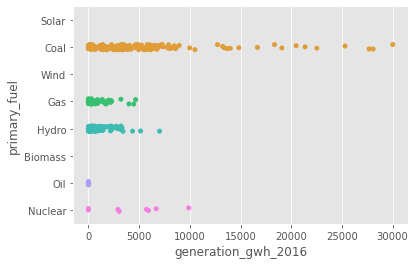

In [104]:
sns.stripplot(df['generation_gwh_2016'],df['primary_fuel'])

#### generation_gwh_2016 plots shows coal is widely used in generating electricity rather than others.

# generation_gwh_2017

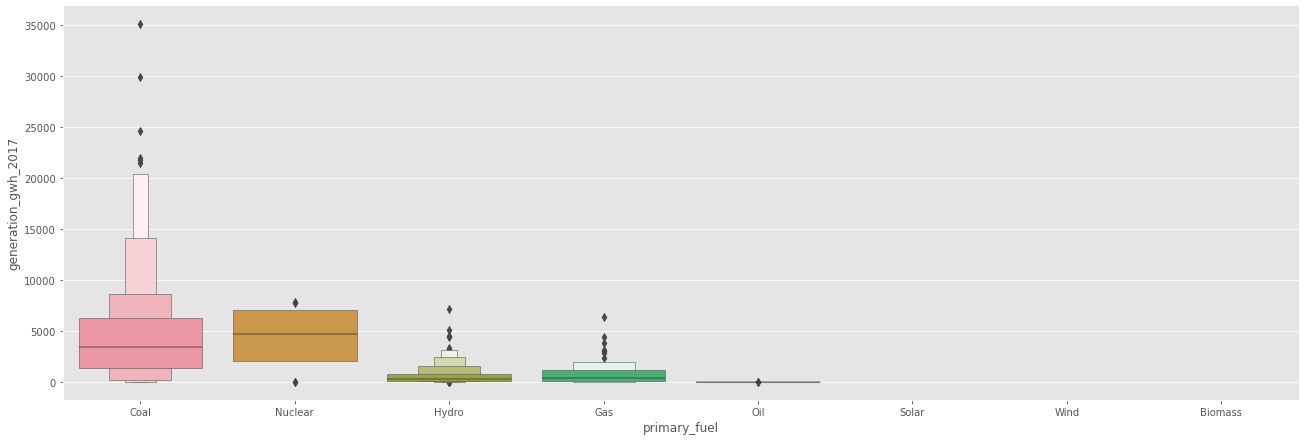

In [77]:
# generation_gwh_2014 vs primary_fuel
sns.catplot(y = "generation_gwh_2017", x = "primary_fuel", data = df.sort_values("generation_gwh_2017", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='primary_fuel'>

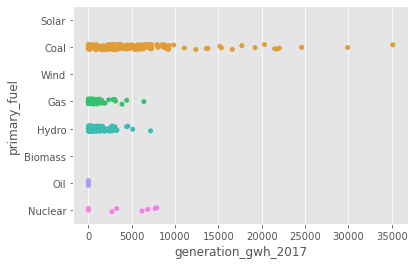

In [105]:
sns.stripplot(df['generation_gwh_2017'],df['primary_fuel'])

#### generation_gwh_2017 plots shows coal is widely used in generating electricity rather than others.

# Label Encoding

#### Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

##### I am encoding all the string data into integer typr

In [444]:
le = LabelEncoder()
df.primary_fuel = le.fit_transform(df.primary_fuel)
df.other_fuel1 = le.fit_transform(df.other_fuel1)
df.geolocation_source = le.fit_transform(df.geolocation_source)
df.generation_data_source = le.fit_transform(df.generation_data_source)
df.name = le.fit_transform(df.name)
df.source = le.fit_transform(df.source)
df.owner = le.fit_transform(df.owner)

In [445]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0,2.5,28.1839,73.2407,6,3,2011.0,229,109,1,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,98.0,24.7663,74.6090,1,3,NaN,258,174,2,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2,39.2,21.9038,69.3732,7,3,NaN,2,21,2,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3,135.0,23.8712,91.3602,2,3,2004.0,280,22,2,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,0
4,4,1800.0,21.9603,82.4091,1,2,2015.0,280,22,2,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,0


In [446]:
df.describe()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
count,908.00000,908.000000,862.000000,862.000000,908.000000,908.000000,528.000000,908.000000,908.000000,908.000000,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,908.000000
mean,453.50000,321.046378,21.196189,77.447848,3.205947,2.776432,1996.876894,227.534141,43.823789,1.754405,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.504405
std,262.26132,580.221767,6.248627,4.907260,2.281339,0.429886,17.047817,83.895877,44.624092,0.699844,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,0.500256
min,0.00000,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,226.75000,16.837500,16.771575,74.258975,1.000000,3.000000,1988.000000,188.750000,22.000000,2.000000,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,0.000000
50%,453.50000,60.000000,21.778300,76.719250,3.000000,3.000000,2000.000000,280.000000,22.000000,2.000000,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,1.000000
75%,680.25000,388.125000,25.516375,79.441475,6.000000,3.000000,2011.250000,280.000000,29.250000,2.000000,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,1.000000
max,907.00000,4760.000000,34.649000,95.408000,7.000000,3.000000,2018.000000,280.000000,190.000000,3.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,1.000000


#### From the Above statistics data show that their multiple outliers mostly in many columns.
#### There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction.
#### a) Also, number of rows in each column are not same, means there is null values present in the data set.
#### b) Also, the mean and 50%value of most of the column are same and the STD and mean have a major difference to each other.
#### c) Most of the column statistics data are near to 0 values.
#### d) By checking the difference between the 75% and max value there are outliers in some of the column, I will check it soon.

## Replacing all the zero values from different columns

In [451]:
# Replacing continous columns with mean
df['capacity_mw'] = df['capacity_mw'].replace(0,df['capacity_mw'].mean())
df['generation_gwh_2013'] = df['generation_gwh_2013'].replace(0,df['generation_gwh_2013'].mean())
df['generation_gwh_2014'] = df['generation_gwh_2014'].replace(0,df['generation_gwh_2014'].mean())
df['generation_gwh_2015'] = df['generation_gwh_2015'].replace(0,df['generation_gwh_2015'].mean())
df['generation_gwh_2016'] = df['generation_gwh_2016'].replace(0,df['generation_gwh_2016'].mean())
df['generation_gwh_2017'] = df['generation_gwh_2017'].replace(0,df['generation_gwh_2017'].mean())
df['name'] = df['name'].replace(0,df['name'].mean())

In [452]:
# Replacing categorial columns with mode
df['owner']=df['owner'].replace(0,df['owner'].mode()[0])
df['source']=df['source'].replace(0,df['source'].mode()[0])
df['primary_fuel']=df['primary_fuel'].replace(0,df['primary_fuel'].mode()[0])
df['other_fuel1']=df['other_fuel1'].replace(0,df['other_fuel1'].mode()[0])
df['geolocation_source']=df['geolocation_source'].replace(0,df['geolocation_source'].mode()[0])
df['generation_data_source']=df['generation_data_source'].replace(0,df['generation_data_source'].mode()[0])

In [453]:
df.describe(include='all')

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.0,908.000000,908.000000,908.000000,908.000000,908.000000,908.0
mean,453.999449,321.399953,21.196189,77.447848,3.261013,2.779736,2003.624449,227.842511,43.848018,2.016520,2018.0,2357.346915,2495.030996,2488.515134,2537.716055,2623.767560,1.0
std,261.828188,580.123724,6.088110,4.781201,2.214301,0.419937,15.238021,83.572589,44.606240,0.158383,0.0,2440.299044,2630.155232,2827.539668,2841.521269,2881.403117,0.0
min,1.000000,1.000000,8.168900,68.644700,1.000000,1.000000,1927.000000,1.000000,1.000000,1.000000,2018.0,0.019900,0.045355,0.118300,0.099500,0.425769,1.0
25%,227.750000,16.987500,17.057825,74.390250,1.000000,3.000000,1997.000000,189.750000,22.000000,2.000000,2018.0,1663.834050,1610.740250,1291.945312,1338.095175,1429.468075,1.0
50%,453.750000,60.000000,21.278850,76.978950,3.000000,3.000000,2013.000000,280.000000,22.000000,2.000000,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1.0
75%,680.250000,388.125000,25.183775,79.211600,6.000000,3.000000,2013.000000,280.000000,29.250000,2.000000,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1.0
max,907.000000,4760.000000,34.649000,95.408000,7.000000,3.000000,2018.000000,280.000000,190.000000,3.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,1.0


##### After understanding the Describe I got that in this dataset there are zero values which I have replace with mean because all the zero value column are continuous in nature.

## Histogram Plot

#### Histograms group the data in bins and is the fastest way to get idea about the distribution of each attribute in dataset.
#### THe following are some of the characteristics of histograms:
#### a)provides us a count of the number of observations in each bin created for visualization.¶
#### b)From the shape of the bin, I can easily observe the distribution i.e. global power plant it is Gaussian, skewed or exponential.
#### Histograms also help us to see possible outliers.

array([[<AxesSubplot:title={'center':'name'}>,
        <AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'primary_fuel'}>,
        <AxesSubplot:title={'center':'other_fuel1'}>,
        <AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'owner'}>],
       [<AxesSubplot:title={'center':'source'}>,
        <AxesSubplot:title={'center':'geolocation_source'}>,
        <AxesSubplot:title={'center':'year_of_capacity_data'}>,
        <AxesSubplot:title={'center':'generation_gwh_2013'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2014'}>,
        <AxesSubplot:title={'center':'generation_gwh_2015'}>,
        <AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>],
       [<AxesSubplot:title={'center':'generation_data_source'}>,
        <AxesSubplot:>, <

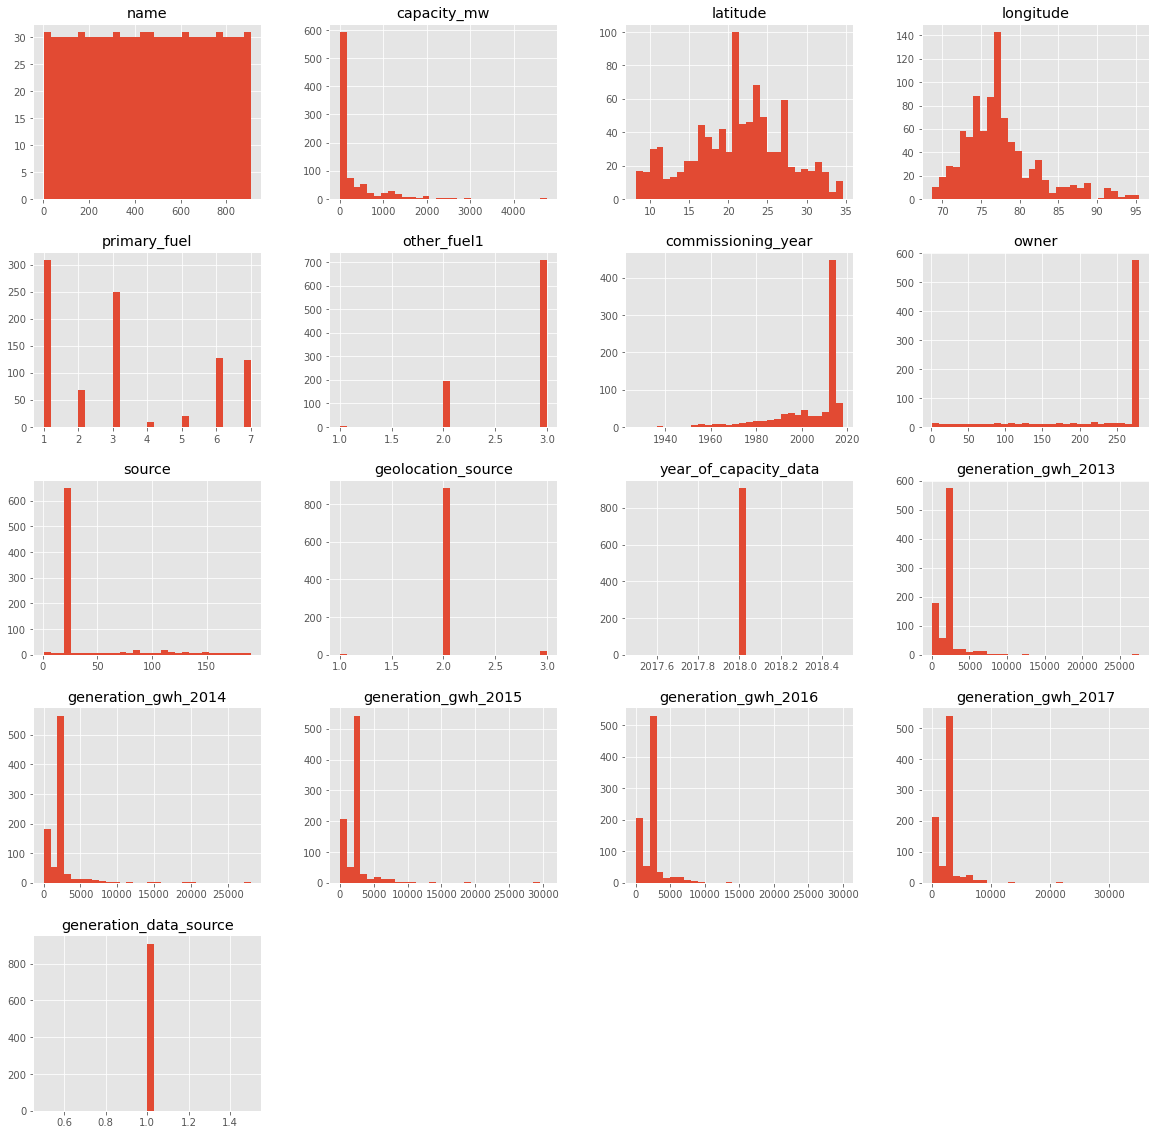

In [327]:
# ploting histogram to check the skewness

df.hist(figsize=(20,20),grid=True,layout=(5,4),bins=30)

#### By making Histogram Plot I can see there are some skewness in this dataset.
##### From plotting this histogram, I used the bin size as 30, we can take any bin size (suited as per as data).

# Distribution Plot

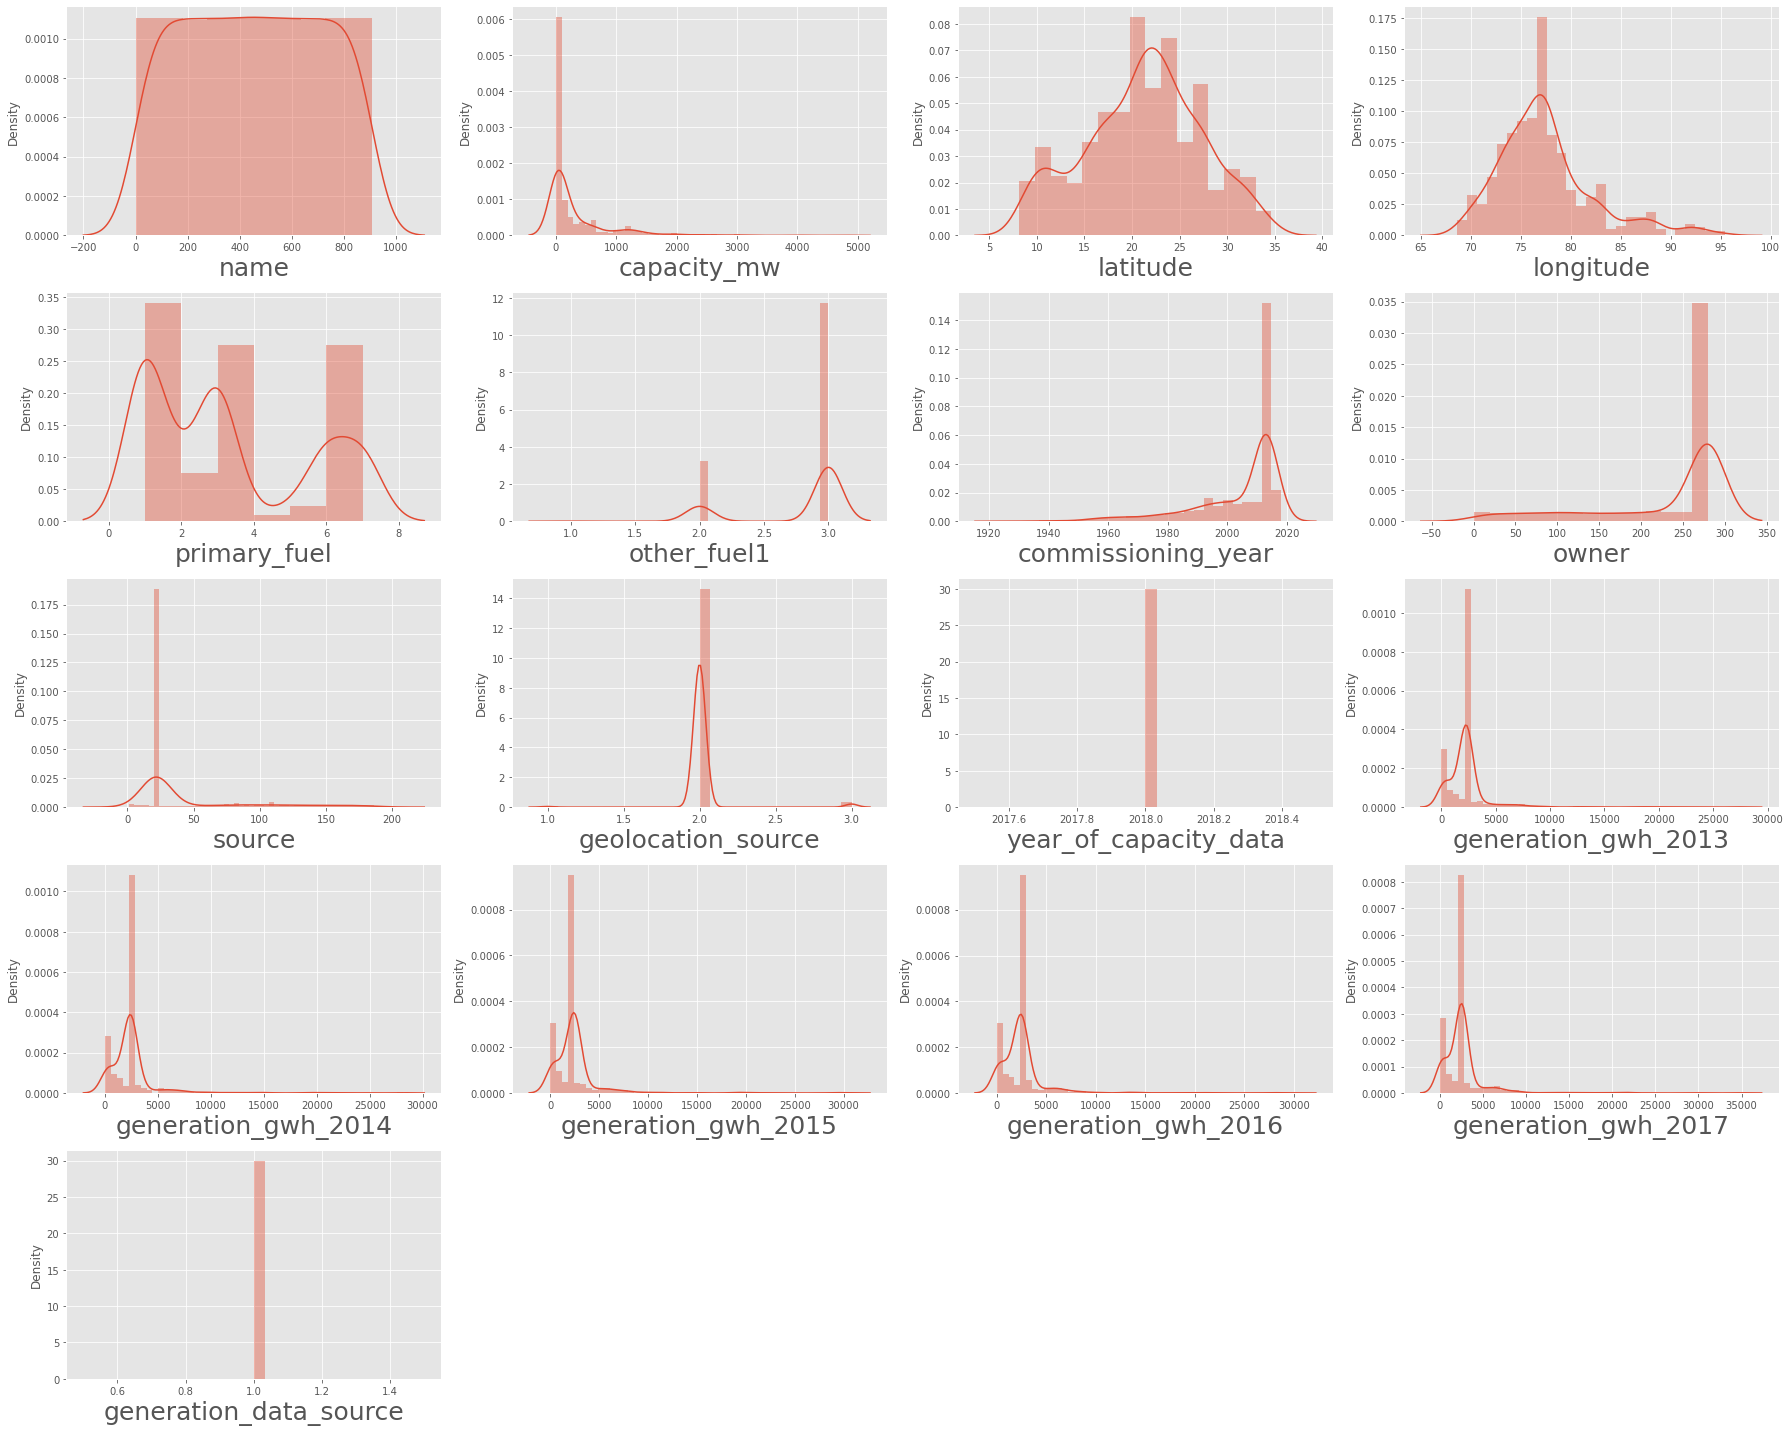

In [328]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=17:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

#### From the above  Distribution Plot I can see that there are skewness in this dataset.

## Box Plot

name                         AxesSubplot(0.125,0.749828;0.168478x0.130172)
capacity_mw               AxesSubplot(0.327174,0.749828;0.168478x0.130172)
latitude                  AxesSubplot(0.529348,0.749828;0.168478x0.130172)
longitude                 AxesSubplot(0.731522,0.749828;0.168478x0.130172)
primary_fuel                 AxesSubplot(0.125,0.593621;0.168478x0.130172)
other_fuel1               AxesSubplot(0.327174,0.593621;0.168478x0.130172)
commissioning_year        AxesSubplot(0.529348,0.593621;0.168478x0.130172)
owner                     AxesSubplot(0.731522,0.593621;0.168478x0.130172)
source                       AxesSubplot(0.125,0.437414;0.168478x0.130172)
geolocation_source        AxesSubplot(0.327174,0.437414;0.168478x0.130172)
year_of_capacity_data     AxesSubplot(0.529348,0.437414;0.168478x0.130172)
generation_gwh_2013       AxesSubplot(0.731522,0.437414;0.168478x0.130172)
generation_gwh_2014          AxesSubplot(0.125,0.281207;0.168478x0.130172)
generation_gwh_2015      

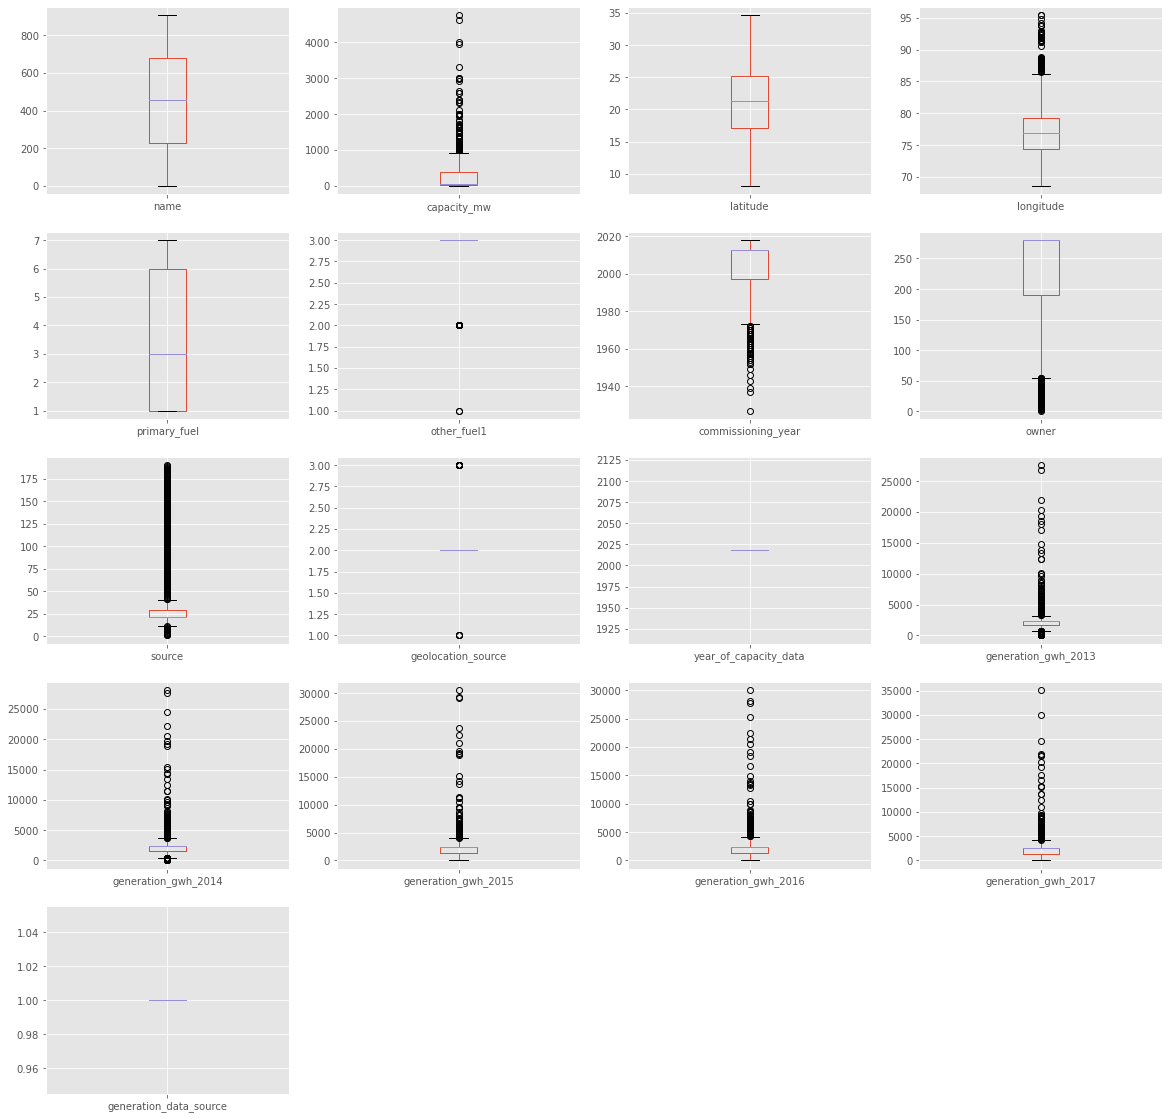

In [329]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(20,20))

#### From above image I can clear see that there are number of black dots in most of the column which are referring to the outliers, so it means most of the data are outside the distribution.
#### So now I detect the outliers now the second step is to remove the outliers, there are different way to remove the outliers that are zscore values.

## Z score

In [454]:
z_score = zscore(df[['capacity_mw','longitude','commissioning_year','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]

In [455]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,453.5,2.5,28.1839,73.2407,6,3,2011.0,229,109,1,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
1,1.0,98.0,24.7663,74.6090,1,3,2013.0,258,174,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
2,2.0,39.2,21.9038,69.3732,7,3,2013.0,2,21,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
3,3.0,135.0,23.8712,91.3602,2,3,2004.0,280,22,2,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,1
4,4.0,1800.0,21.9603,82.4091,1,2,2015.0,280,22,2,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,1


In [456]:
df.shape

(850, 17)

#### I am using zscore value then I again check if there are some of the outliers then I will remove it by replacing the outliers with the mean value of that column.
#### So, I first find the zscore value and then I decide to make one threshold value as 3 which is standard of industry recommend value and then I remove all the outliers which zscore value is greater than 3.
#### After, removing the outlier’s final there are 850 and 17 column presents in the data set.

# After Removing Skewness making Distribution Plot

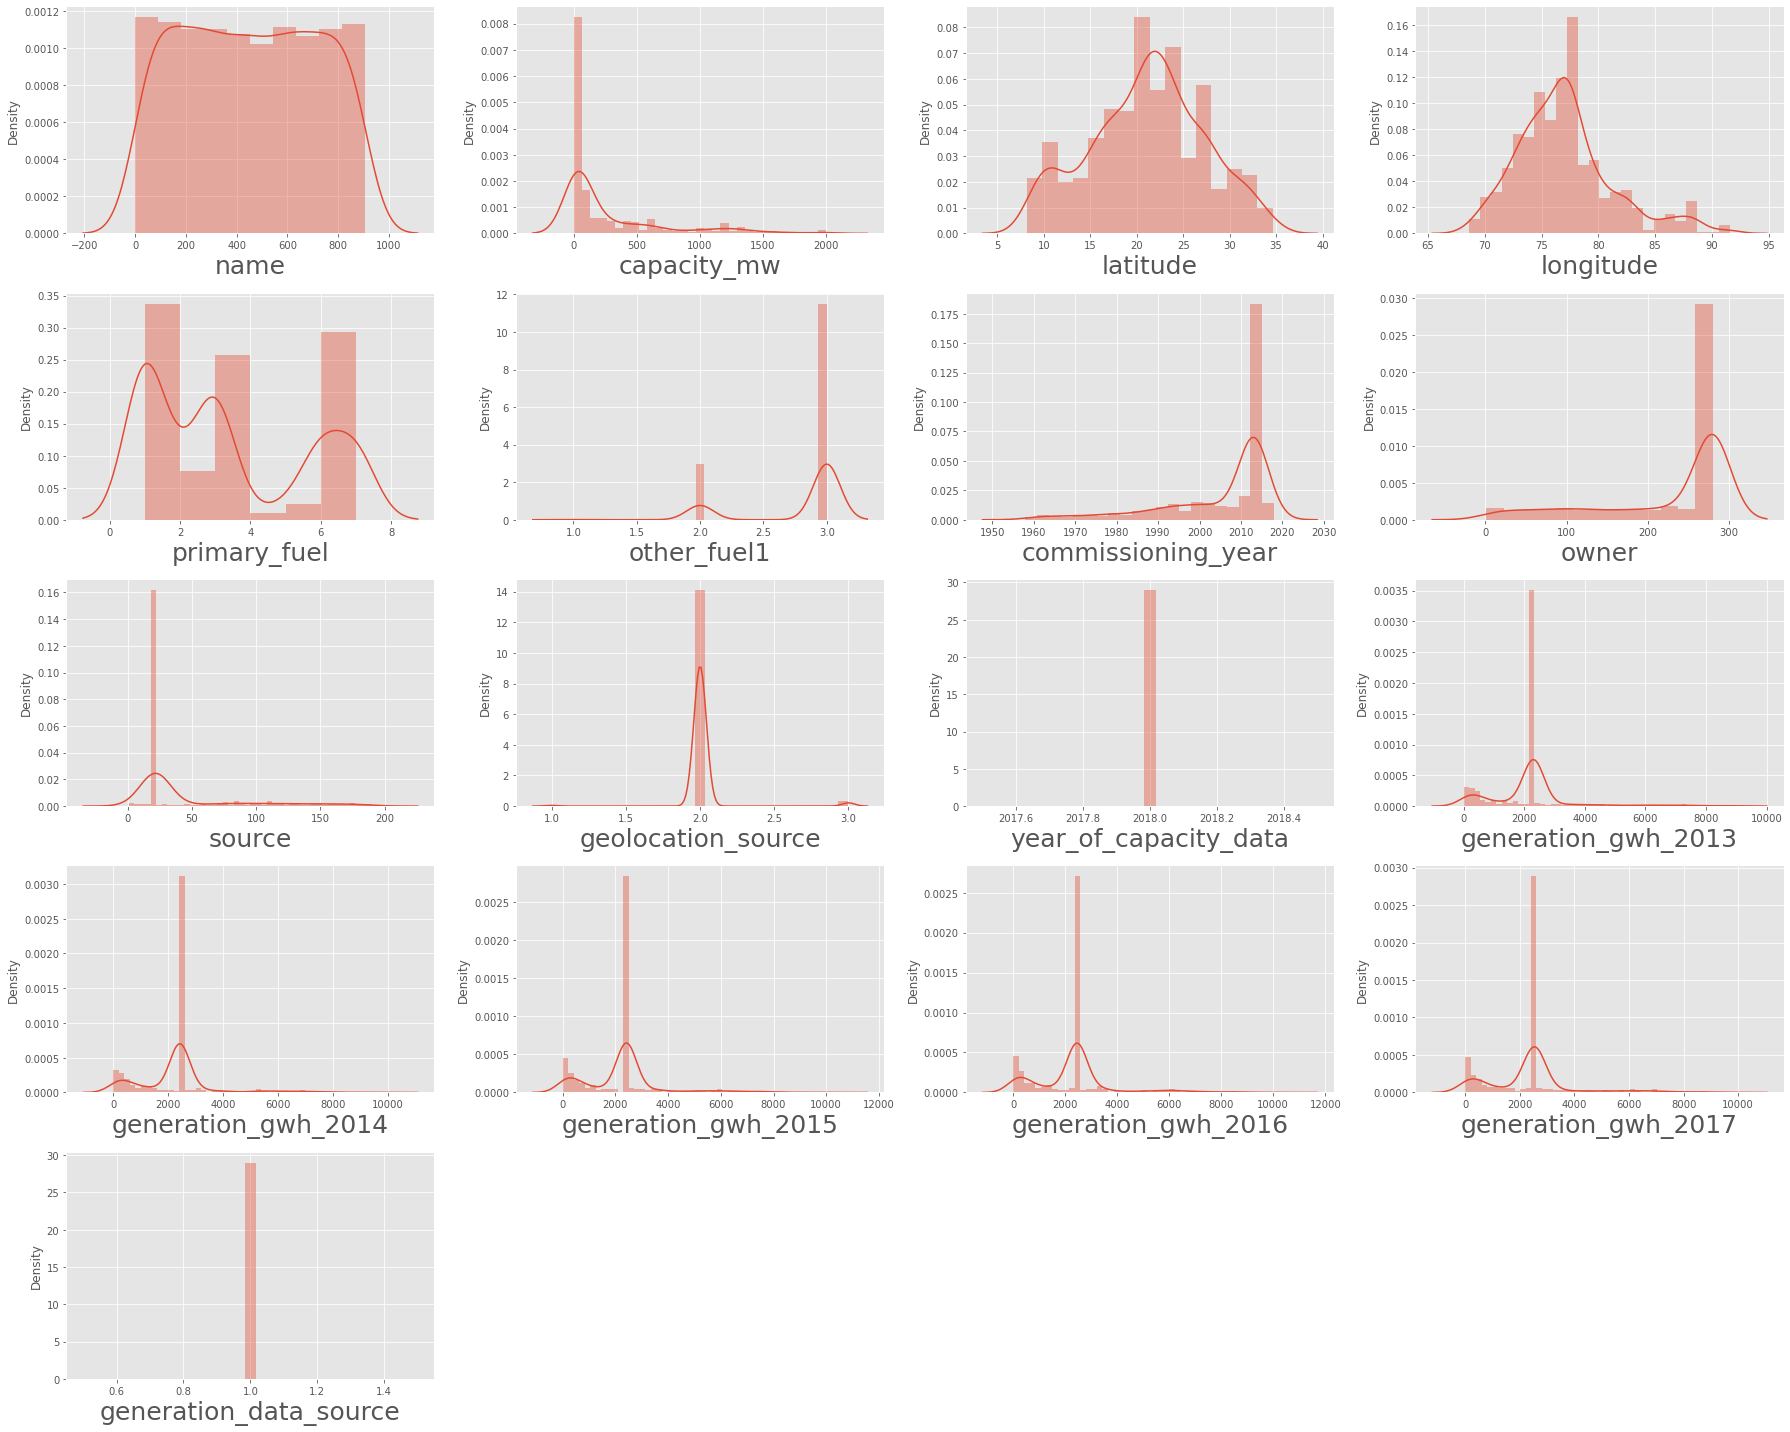

In [377]:
# ploting distribution plot to check the skewness

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=17:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

#### Hence After Rmoving Outliers I make distribution plot which shows few outliers are removed.

# Correlation

#### Correlation Matrix is basically a covariance matrix. A summary measure called the correlation describes the strength of the linear association. Correlation summarizes the strength and direction of the linear (straight-line) association between two quantitative variables.
Denoted by r, it takes values between -1 and +1.

In [457]:
df.corr()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
name,1.000000,0.037518,-0.133687,0.009753,0.048366,-0.020431,-0.014076,0.118149,-0.001927,0.069933,NaN,0.074914,0.067119,0.042953,0.041398,0.053822,NaN
capacity_mw,0.037518,1.000000,0.050389,0.266507,-0.427681,-0.618026,-0.039815,0.354381,-0.280075,-0.061791,NaN,0.437427,0.440390,0.437126,0.515897,0.553250,NaN
latitude,-0.133687,0.050389,1.000000,-0.025470,-0.021345,-0.049265,0.041870,-0.004862,0.069737,-0.028300,NaN,0.045703,0.047020,0.033971,0.014691,0.010677,NaN
longitude,0.009753,0.266507,-0.025470,1.000000,-0.402781,-0.347913,-0.111962,0.263255,-0.237431,0.046842,NaN,-0.028456,-0.037213,-0.046165,-0.003965,-0.001227,NaN
primary_fuel,0.048366,-0.427681,-0.021345,-0.402781,1.000000,0.495462,0.180975,-0.270644,0.075479,0.175685,NaN,-0.052491,-0.059411,-0.049336,-0.058787,-0.069996,NaN
other_fuel1,-0.020431,-0.618026,-0.049265,-0.347913,0.495462,1.000000,-0.003052,-0.329971,0.257372,0.054563,NaN,-0.281718,-0.307023,-0.294140,-0.335019,-0.346328,NaN
commissioning_year,-0.014076,-0.039815,0.041870,-0.111962,0.180975,-0.003052,1.000000,-0.396956,0.309460,0.068197,NaN,0.182220,0.222384,0.230593,0.270415,0.282342,NaN
owner,0.118149,0.354381,-0.004862,0.263255,-0.270644,-0.329971,-0.396956,1.000000,-0.231643,-0.036777,NaN,-0.081293,-0.082887,-0.092145,-0.085477,-0.081363,NaN
source,-0.001927,-0.280075,0.069737,-0.237431,0.075479,0.257372,0.309460,-0.231643,1.000000,-0.057283,NaN,0.063407,0.064651,0.071872,0.066670,0.063462,NaN
geolocation_source,0.069933,-0.061791,-0.028300,0.046842,0.175685,0.054563,0.068197,-0.036777,-0.057283,1.000000,NaN,0.013442,0.013706,0.015237,0.014134,0.013454,NaN


#### Now I am finding the correlation value of each column, this value is categorized into mainly 2 parts that are:
###### Positive correlated value
###### Negative correlated value The most the value is positive means that column is much co related and vice versa.

# Heatmap

#### I am using seaborn heatmap to plot the correlated matrix and plot the corr value in the heatmap graph

[]

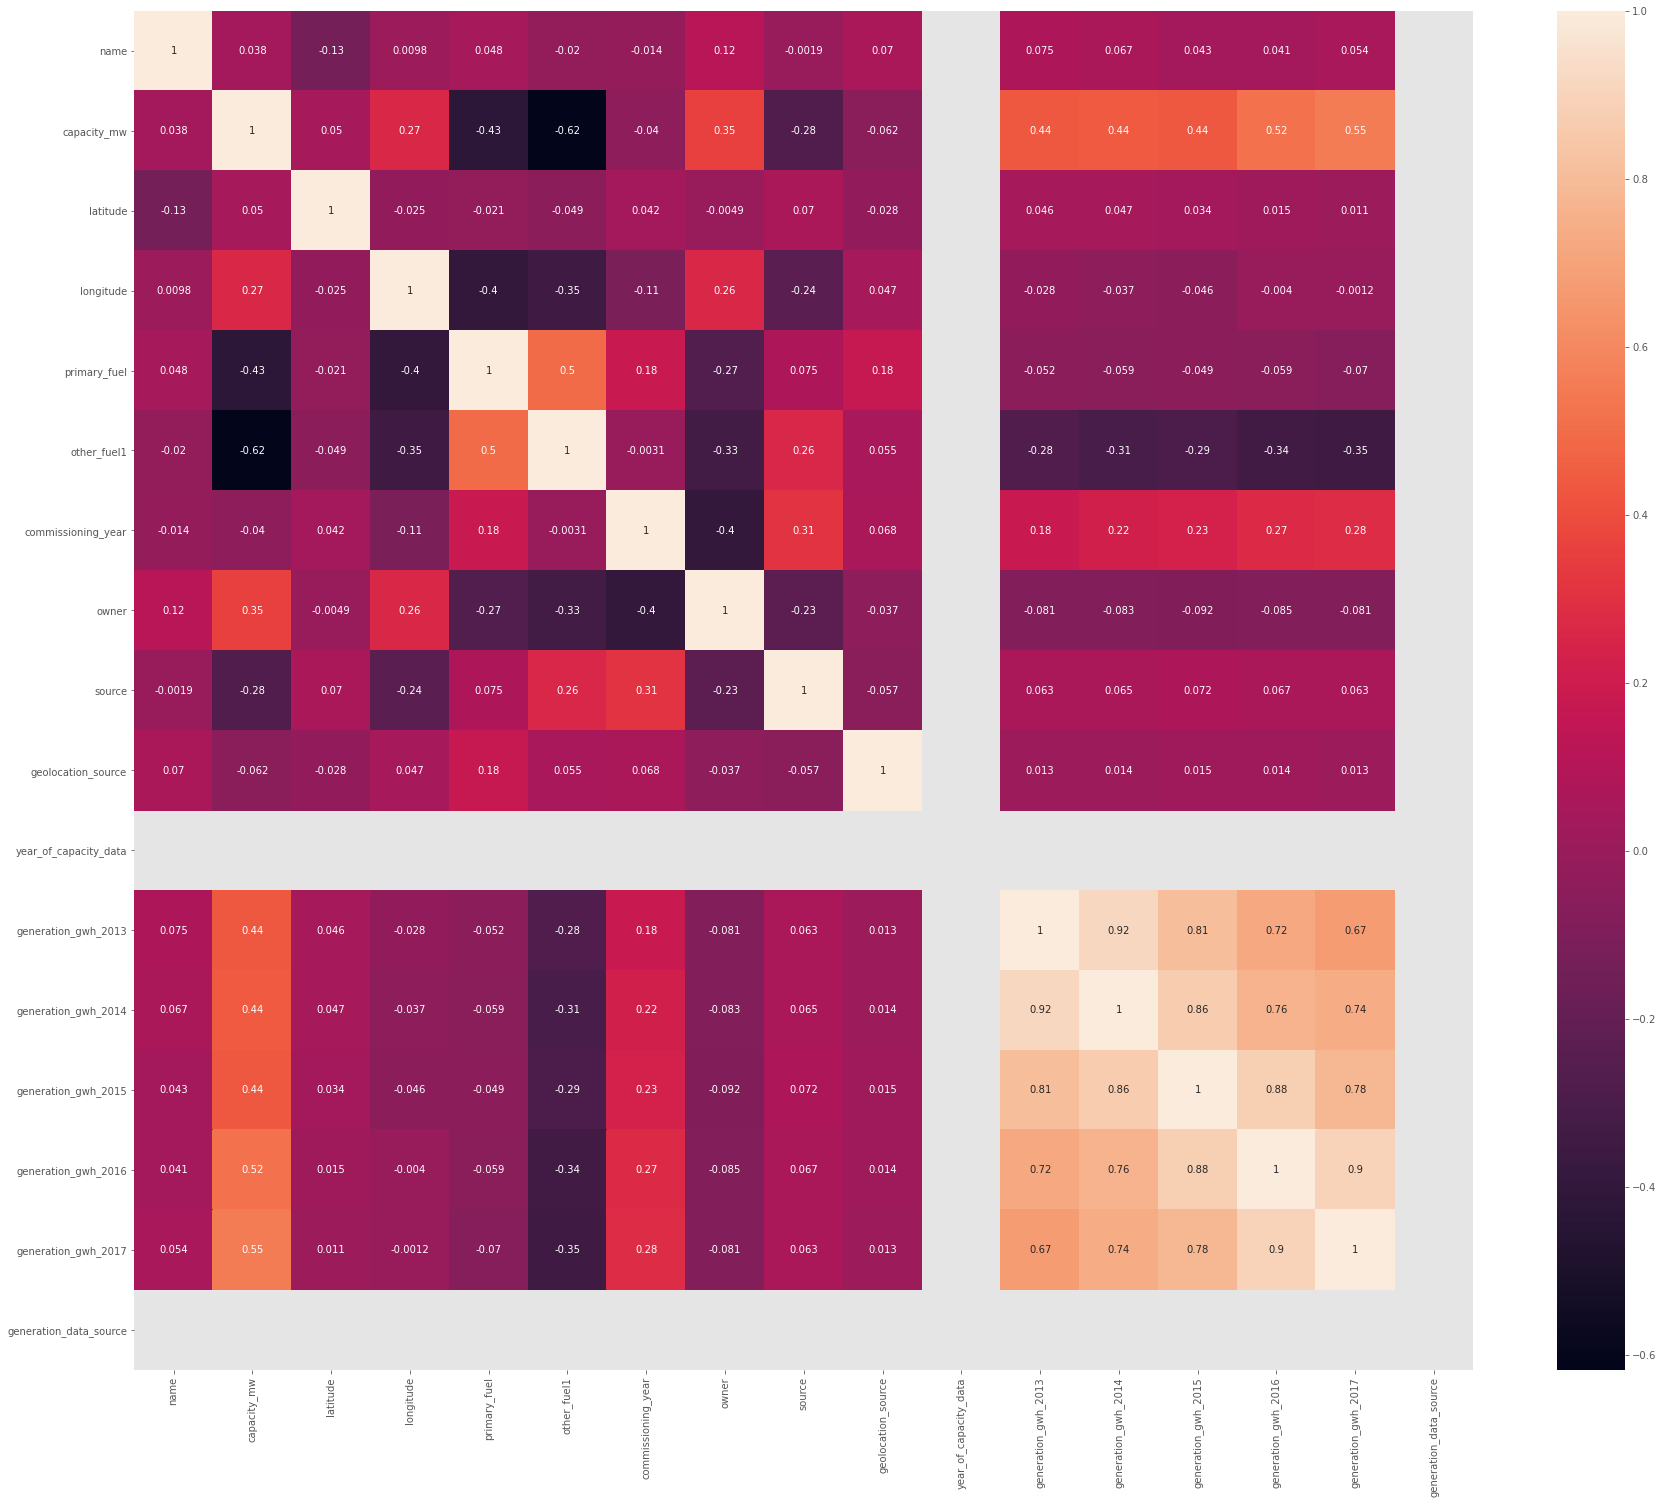

In [458]:
#checking the co-relation of all column to each other
df_cor = df.corr()
plt.figure(figsize=(30,25))
sns.heatmap(df_cor,annot=True)
plt.plot()

# 8. Machine Learning

# Classification Model

# i)Using Primary Fuel as a prediction

In [216]:
# dividing features and label

x = df.drop('primary_fuel',axis=1)
y = df.primary_fuel

#### Hence dividing Dataset in Features & labels.

## StandardScaler

In [217]:
# standard scaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.01132858, -0.6327477 ,  1.15775395, ...,  0.13099063,
         0.12468691,  0.        ],
       [-1.6990752 , -0.40484315,  0.59922135, ...,  0.13099063,
         0.12468691,  0.        ],
       [-1.69529531, -0.54516553,  0.1314078 , ...,  0.13099063,
         0.12468691,  0.        ],
       ...,
       [ 1.71795246, -0.57785969, -0.95179505, ...,  0.13099063,
         0.12468691,  0.        ],
       [ 1.72173236, -0.44779898,  0.53118614, ...,  0.13099063,
         0.12468691,  0.        ],
       [ 1.72551225, -0.59933761, -1.82473104, ...,  0.13099063,
         0.12468691,  0.        ]])

#### Applying the standard scaler to scaled the dataset in one range & on x variable.

## VIF - variance inflation factor

##### Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable.

In [218]:
# finding variance inflation factor(vif)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.053250,name
1,2.617915,capacity_mw
2,1.038320,latitude
3,1.231601,longitude
4,1.825472,other_fuel1
5,1.403254,commissioning_year
6,1.578909,owner
7,1.312920,source
8,1.036697,geolocation_source
9,NaN,year_of_capacity_data


#### According to my concern about vif in this dataset all the values are less than 10 and overall model variance there is no multicollinearity exists.

## Model Building

#### A machine learning model is built by learning and generalizing from training data, then applying that acquired knowledge to new data it has never seen before to make predictions and fulfill its purpose. Lack of data will prevent you from building the model, and access to data isn't enough.
#### So in this dataset while predicting primary_fuel label , I have used these Algorithmns for Model Building:
#### a)Logistic Regression
#### b)RandomForestClassifier
#### c)Decision Tree Classifier
#### d)XGBoost Model
#### e)AdaBoostClassifier

# Train test Split

In [219]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

#### Splitting the dataset into the Training set and Test set.

#### The data should be divided into train and test data.

#### I will use train_test_split feature to divide the data and I will be using testing set of 25% and a training set of 75% of the data.

# XGBoost Model

#### XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.
#### XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models.

In [220]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

[17:53:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### First I have to fit the Training data of XGBoost Model.

In [221]:
# checking training accuracy

y_pred = xgb.predict(x_train)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_train,predictions)
accuracy

1.0

In [222]:
# checking initial test accuracy

y_pred = xgb.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test,predictions)
accuracy

0.8779342723004695

In [223]:
x_test

array([[ 1.48737869, -0.61007657, -0.49476778, ...,  0.13099063,
         0.12468691,  0.        ],
       [-1.02625339, -0.62678161,  0.01576411, ...,  0.13099063,
         0.12468691,  0.        ],
       [ 0.0585773 , -0.61007657, -1.92360517, ...,  0.13099063,
         0.12468691,  0.        ],
       ...,
       [-1.13587042, -0.29506714,  1.45063382, ..., -0.98325016,
        -0.98317711,  0.        ],
       [-0.93931573, -0.60291726,  0.01576411, ...,  0.13099063,
         0.12468691,  0.        ],
       [ 1.60833542, -0.45973116,  0.55534084, ...,  0.13099063,
         0.12468691,  0.        ]])

In [224]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           1       0.93      0.90      0.92        62
           2       0.42      0.36      0.38        14
           3       0.95      0.93      0.94        58
           4       0.00      0.00      0.00         0
           5       0.17      0.25      0.20         4
           6       0.90      0.88      0.89        32
           7       0.98      1.00      0.99        43

    accuracy                           0.88       213
   macro avg       0.62      0.62      0.62       213
weighted avg       0.89      0.88      0.89       213



#### According to my perception of modelling XGBoost Model I got Accuracy Score : 88%.
#### But this score can improve the accuracy by using Grid Search CV.

# Let use Grid search CV for the best parameter to improve the accuracy

In [225]:
param_grid = {'learning_rate':[1,0.5,0.1,0.01,0.001],
             'max_depth':[3,5,10,20],
             'n_estimators':[10,50,100,200]
             }

In [226]:
grid = GridSearchCV(XGBClassifier(),param_grid,verbose=3)

In [227]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[17:53:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.836 total time=   0.0s
[17:53:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.859 total time=   0.0s
[17:53:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [228]:
# to find best parameters giving maximum accuracy

grid.best_params_

{'learning_rate': 0.5, 'max_depth': 20, 'n_estimators': 50}

In [229]:
xgb = XGBClassifier(learning_rate='1',max_depth=3,n_estimators=10)
xgb.fit(x_train,y_train)

[17:55:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate='1', max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [230]:
y_pred = xgb.predict(x_test)

In [231]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[56,  2,  0,  0,  1,  3,  0],
       [ 2,  7,  1,  0,  3,  1,  0],
       [ 1,  4, 52,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  0,  1,  1,  0],
       [ 4,  0,  1,  0,  0, 26,  1],
       [ 0,  0,  0,  0,  0,  0, 43]], dtype=int64)

In [232]:
xgb.score(x_test,y_test)

0.8685446009389671

In [233]:
# Finding classification report
print(classification_report(y_test, y_pred))

# finding confusion matrix
cfm = metrics.confusion_matrix(y_pred, y_test, [1,0])

              precision    recall  f1-score   support

           1       0.89      0.90      0.90        62
           2       0.50      0.50      0.50        14
           3       0.95      0.90      0.92        58
           4       0.00      0.00      0.00         0
           5       0.20      0.25      0.22         4
           6       0.84      0.81      0.83        32
           7       0.98      1.00      0.99        43

    accuracy                           0.87       213
   macro avg       0.62      0.62      0.62       213
weighted avg       0.88      0.87      0.87       213



#### In prediction XGBClassifier with primary_fuel:
#### I had done this prediction by taking primary_fuel as an output variable which is Classification in nature.
#### While calculating the best random state the 370 is best state which providing the highest accuracy value for this model.
#### After calculating confusion matrix and classification report of XGBClassifier - 88%.
#### Therefore i use hypertuning method by using Grid Search Cv to improve my Accuracy Score and this gives a decreasing value of XGBClassifier - 87%

# AdaBoostClassifier

#### AdaBoost can be used to boost the performance of any machine learning algorithm. It is best used with weak learners. These are models that achieve accuracy just above random chance on a classification problem. The most suited and therefore most common algorithm used with AdaBoost are decision trees with one level.

In [234]:
ada = AdaBoostClassifier()

In [235]:
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

#### First I have to fit the Training data of AdaBoostClassifier.

In [236]:
#accuracy_score before tuning
print(accuracy_score(y_test,y_pred))

0.5915492957746479


#### According to my perception of modelling AdaBoost Model I got Accuracy Score : 59%.
#### But this score can improve the accuracy by using Grid Search CV.

# Hyperparameter tuning for AdaBoost using GridSearchCV

In [237]:
params = {'n_estimators':[40,42,44,45],'learning_rate':[0.20,0.22,0.234567]}

In [238]:
grd_ada = GridSearchCV(AdaBoostClassifier(),param_grid = params)

In [239]:
grd_ada.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.2, 0.22, 0.234567],
                         'n_estimators': [40, 42, 44, 45]})

In [240]:
grd_ada.best_estimator_

AdaBoostClassifier(learning_rate=0.22, n_estimators=40)

In [241]:
ada = AdaBoostClassifier(learning_rate = 0.2434567,n_estimators = 44)

In [242]:
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

In [243]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[23, 38,  0,  0,  0,  1],
       [ 0,  4,  9,  0,  0,  1],
       [ 0,  1, 57,  0,  0,  0],
       [ 0,  2,  2,  0,  0,  0],
       [ 2, 27,  1,  0,  0,  2],
       [ 0,  0,  0,  0,  0, 43]], dtype=int64)

In [244]:
ada.score(x_test,y_test)

0.596244131455399

In [245]:
# Finding classification report
print(classification_report(y_test, y_pred))

# finding confusion matrix
cfm = metrics.confusion_matrix(y_pred, y_test, [1,0])


              precision    recall  f1-score   support

           1       0.92      0.37      0.53        62
           2       0.06      0.29      0.09        14
           3       0.83      0.98      0.90        58
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00        32
           7       0.91      1.00      0.96        43

    accuracy                           0.60       213
   macro avg       0.45      0.44      0.41       213
weighted avg       0.68      0.60      0.60       213



#### In prediction AdaBoostClassifier with Primary_fuel:
#### I had done this prediction by taking Primary_fuel as an output variable which is Classification in nature.
#### While calculating the best random state the 370 is best state which providing the highest accuracy value for this model.
#### After calculating confusion matrix and classification report of AdaBoostClassifier - 59%.
#### Therefore i use hypertuning method by using Grid Search Cv to improve my Accuracy Score and this gives a increasing value of AdaBoostClassifier - 60%

## Logistic Regression

#### Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regressionis estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variablesthe independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable.
#### The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling; the function that converts log-odds to probability is the logistic function, hence the name. The unit of measurement for the log-odds scale is called a logit, from logistic unit, hence the alternative names. Analogous models with a different sigmoid function instead of the logistic function can also be used, such as the probit model; the defining characteristic of the logistic model is that increasing one of the independent variables multiplicatively scales the odds of the given outcome at a constant rate, with each independent variable having its own parameter; for a binary dependent variable this generalizes the odds ratio.

In [164]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

#### First I have to fit the Training data of Logistic Regression.

In [165]:
y_pred = log_reg.predict(x_test)

In [166]:
y_pred_proba = log_reg.predict_proba(x_test)

In [167]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[54,  0,  0,  0,  0,  8,  0],
       [ 0,  0,  9,  0,  0,  3,  2],
       [ 0,  2, 55,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  2,  0,  0,  0,  0],
       [ 7,  0,  0,  0,  0, 20,  5],
       [ 3,  0,  0,  0,  0,  1, 39]], dtype=int64)

In [168]:
log_reg.score(x_test,y_test)

0.7887323943661971

In [169]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           1       0.82      0.87      0.84        62
           2       0.00      0.00      0.00        14
           3       0.83      0.95      0.89        58
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         4
           6       0.62      0.62      0.62        32
           7       0.85      0.91      0.88        43

    accuracy                           0.79       213
   macro avg       0.45      0.48      0.46       213
weighted avg       0.73      0.79      0.76       213



#### In prediction Logistic Regression with primary_fuel:
#### I had done this prediction by taking primary_fuel as an output variable which is Classification in nature.
#### While calculating the best random state the 370 is best state which providing the highest accuracy value for this model.
#### After calculating confusion matrix and classification report I used Heat Map of Logistic Regression - 79%

## RandomForestClassifier

#### A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
#### It works in four steps:
#### Select random samples from a given dataset.
#### Construct a decision tree for each sample and get a prediction result from each decision tree.
#### Perform a vote for each predicted result.¶
#### Select the prediction result with the most votes as the final prediction.

In [248]:
rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)
y_pred_proba = rfc.predict_proba(x_test)

#### First I have to fit the Training data of RandomForestClassifier.

In [249]:
y_pred = rfc.predict(x_test)

In [250]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[61,  0,  0,  0,  1,  0,  0],
       [ 2,  8,  1,  1,  2,  0,  0],
       [ 0,  1, 57,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  1,  0,  1,  0,  0],
       [ 2,  1,  0,  0,  0, 28,  1],
       [ 0,  0,  0,  0,  0,  0, 43]], dtype=int64)

In [251]:
rfc.score(x_test,y_test)

0.9295774647887324

In [252]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           1       0.94      0.98      0.96        62
           2       0.67      0.57      0.62        14
           3       0.97      0.98      0.97        58
           4       0.00      0.00      0.00         0
           5       0.25      0.25      0.25         4
           6       1.00      0.88      0.93        32
           7       0.98      1.00      0.99        43

    accuracy                           0.93       213
   macro avg       0.69      0.67      0.67       213
weighted avg       0.93      0.93      0.93       213



### According to my perception of modelling RandomForestClassifier I got Accuracy Score : 93%.
### But this score can improve the accuracy by using Grid Search CV.¶

## Let use Grid search CV for the best parameter to improve the accuracy

In [253]:
params = {'n_estimators':[13,15],
         'criterion':['entropy'],
         'max_depth':[10],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]
         }

grd = GridSearchCV(rfc,param_grid=params)
grd.fit(x_train,y_train)
print(grd.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 13}


In [254]:
rfc = grd.best_estimator_

In [255]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=13)

In [256]:
y_pred_proba = rfc.predict_proba(x_test)

In [257]:
y_pred = rfc.predict(x_test)

In [258]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[59,  0,  0,  0,  3,  0],
       [ 3,  4,  6,  0,  0,  1],
       [ 0,  1, 57,  0,  0,  0],
       [ 0,  2,  2,  0,  0,  0],
       [ 4,  0,  1,  0, 25,  2],
       [ 0,  0,  0,  0,  0, 43]], dtype=int64)

In [259]:
rfc.score(x_test,y_test)

0.8826291079812206

In [260]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           1       0.89      0.95      0.92        62
           2       0.57      0.29      0.38        14
           3       0.86      0.98      0.92        58
           5       0.00      0.00      0.00         4
           6       0.89      0.78      0.83        32
           7       0.93      1.00      0.97        43

    accuracy                           0.88       213
   macro avg       0.69      0.67      0.67       213
weighted avg       0.86      0.88      0.86       213



#### In prediction RandomForestClassifier with primary_fuel:
#### I had done this prediction by taking primary_fuel as an output variable which is Classification in nature.
#### While calculating the best random state the 370 is best state which providing the highest accuracy value for this model.
#### After calculating confusion matrix and classification report of RandomForestClassifier - 93%.
#### Therefore i use hypertuning method by using Grid Search Cv to improve my Accuracy Score and this gives a decreasing value of RandomForestClassifier - 88%


## Decision Tree Classifier

#### Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.
#### The tree's branches contain the logic for a decision rule, meaning your data is continually split given the input features. The decision tree classifier is commonly used for image classification, decision analysis, strategy analysis, in medicine for diagnosis, in psychology for behavioral thinking analysis, and more.¶

In [261]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_proba = dtc.predict_proba(x_test)

##### First I have to fit the Training data of Decision Tree Classifier.

In [262]:
y_pred = dtc.predict(x_test)

In [263]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[57,  3,  0,  0,  0,  1,  1],
       [ 2,  8,  1,  1,  0,  1,  1],
       [ 0,  2, 51,  3,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  1,  0,  1,  0,  0],
       [ 3,  1,  0,  0,  0, 27,  1],
       [ 0,  0,  0,  0,  0,  0, 43]], dtype=int64)

In [264]:
dtc.score(x_test,y_test)

0.8779342723004695

In [265]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           1       0.92      0.92      0.92        62
           2       0.50      0.57      0.53        14
           3       0.96      0.88      0.92        58
           4       0.00      0.00      0.00         0
           5       0.33      0.25      0.29         4
           6       0.93      0.84      0.89        32
           7       0.93      1.00      0.97        43

    accuracy                           0.88       213
   macro avg       0.65      0.64      0.64       213
weighted avg       0.90      0.88      0.89       213



#### According to my perception of modelling Decision Tree Classifier I got Accuracy Score : 88%.
#### But this score can improve the accuracy by using Grid Search CV.

## Let use Grid search CV  to improve the accuracy

In [266]:
grid_param = {'criterion':['gini','entropy'],
             'max_depth':range(2,10,3),
             'min_samples_leaf':range(1,10,2),
             'min_samples_split':range(2,10,2)
             }

In [267]:
grid_search = GridSearchCV(estimator=dtc,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=1)

In [268]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [269]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 4}


In [270]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_leaf=5,min_samples_split=2)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=5)

In [271]:
y_pred_proba = dtc.predict_proba(x_test)

In [272]:
y_pred = dtc.predict(x_test)

In [273]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[58,  0,  0,  0,  3,  1],
       [ 1,  7,  4,  0,  1,  1],
       [ 0,  1, 55,  2,  0,  0],
       [ 0,  2,  2,  0,  0,  0],
       [ 5,  1,  0,  0, 25,  1],
       [ 0,  0,  0,  0,  0, 43]], dtype=int64)

In [274]:
dtc.score(x_test,y_test)

0.8826291079812206

In [275]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8826291079812206

In [276]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           1       0.91      0.94      0.92        62
           2       0.64      0.50      0.56        14
           3       0.90      0.95      0.92        58
           5       0.00      0.00      0.00         4
           6       0.86      0.78      0.82        32
           7       0.93      1.00      0.97        43

    accuracy                           0.88       213
   macro avg       0.71      0.69      0.70       213
weighted avg       0.87      0.88      0.87       213



#### In prediction Decision Tree Classifier with primary_fuel:
#### I had done this prediction by taking primary_fuel as an output variable which is Classification in nature.
#### While calculating the best random state the 370 is best state which providing the highest accuracy value for this model.
#### After calculating confusion matrix and classification report of Decision Tree Classifier - 88%.
#### Therefore i use hypertuning method by using Grid Search Cv to improve my Accuracy Score and this gives a increasing value of Decision Tree Classifier - 88%

## Saving the Best Model

In [279]:
import pickle

In [280]:
# saving the Random Forest Model

filename = 'finalized_model.pickle'
pickle.dump(rfc,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

#### From the Above Coding I Get best model Random Forest Model Accuracy Score.
#### So I use Random Forest Model to Save the Best Model.

# Regression Model

In [459]:
df.drop('generation_gwh_2014',inplace=True,axis=1)

#### Dropping the unwanted column

# ii) Using capacity_mw for prediction

In [460]:
# dividing features and label

x = df.drop('capacity_mw',axis=1)
y = df.capacity_mw

#### Hence dividing Dataset in Features & labels.

## StandardScaler

In [461]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[ 0.01132858,  1.15775395, -0.89219288, ...,  0.13099063,
         0.12468691,  0.        ],
       [-1.6990752 ,  0.59922135, -0.56709319, ...,  0.13099063,
         0.12468691,  0.        ],
       [-1.69529531,  0.1314078 , -1.81108718, ...,  0.13099063,
         0.12468691,  0.        ],
       ...,
       [ 1.71795246, -0.95179505, -0.33612819, ...,  0.13099063,
         0.12468691,  0.        ],
       [ 1.72173236,  0.53118614, -0.77173279, ...,  0.13099063,
         0.12468691,  0.        ],
       [ 1.72551225, -1.82473104,  0.11427851, ...,  0.13099063,
         0.12468691,  0.        ]])

#### Applying the standard scaler to scaled the dataset in one range & on x variable.

## VIF - variance inflation factor

#### Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable.

In [462]:
# finding variance inflation factor(vif)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.056673,name
1,1.034161,latitude
2,1.336545,longitude
3,1.606880,primary_fuel
4,1.908840,other_fuel1
5,1.444181,commissioning_year
6,1.435142,owner
7,1.280210,source
8,1.060391,geolocation_source
9,NaN,year_of_capacity_data


#### According to my concern about vif in this dataset all the values are less than 10 and overall model variance there is no multicollinearity exists.

# Visualize the correlation

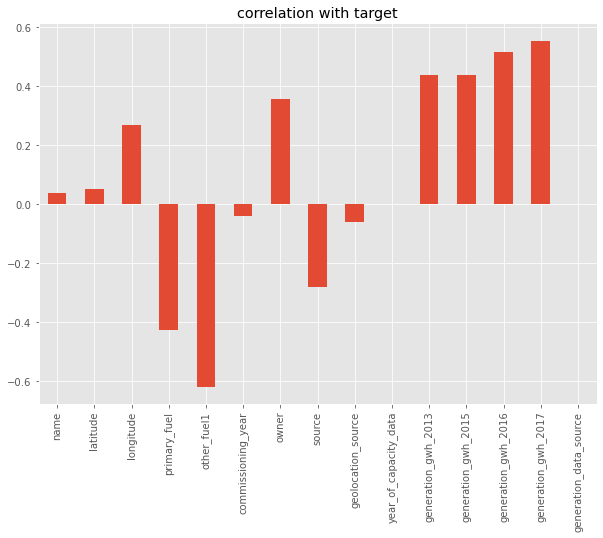

In [463]:
df.drop('capacity_mw',axis=1).corrwith(df.capacity_mw).plot(kind='bar',grid=True,figsize=(10,7),title="correlation with target")
plt.show()

#### I have checked the relationship between label and different features.
#### Most of the features are in minus value only 8 columns are positively related to target value.

## Model Building

#### A machine learning model is built by learning and generalizing from training data, then applying that acquired knowledge to new data it has never seen before to make predictions and fulfill its purpose. Lack of data will prevent you from building the model, and access to data isn't enough.
#### So in this dataset while predicting Next_Tmax label first, I have used these Algorithmns for Model Building:
#### a)Linear Regression model
#### b)Random Forest Regressor Model
#### c)Decision Tree Regressor Model
#### d)AdaBoost Regressor

# Train Test Split

In [464]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

# AdaBoost Regressor

#### An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. As such, subsequent regressors focus more on difficult cases.
#### AdaBoost can be used to boost the performance of any machine learning algorithm. It is best used with weak learners. These are models that achieve accuracy just above random chance on a classification problem. The most suited and therefore most common algorithm used with AdaBoost are decision trees with one level.

In [465]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

#### First I have to fit the Training data of AdaBoostRegressor.

In [466]:
# adjusted r2 score
ada.score(x_train,y_train)

0.7949625706900816

In [467]:
ada.score(x_test,y_test)

0.6586746731902193

In [468]:
y_pred = ada.predict(x_test)
y_pred

array([ 229.99919995,  229.99919995,  229.99919995,   71.20156896,
         71.20156896,   71.20156896,   71.20156896,  373.84756477,
        271.99197203,   71.20156896,  229.99919995,  709.5114459 ,
        229.99919995,  373.84756477, 1187.07142857,  271.99197203,
         71.20156896,  271.99197203,  163.87206868,   71.20156896,
        271.99197203,  670.5       ,  328.62354369,   71.6047619 ,
       1252.01016949,  421.16479991, 1252.01016949,  180.57236275,
        229.99919995,   84.70350877,   71.6047619 ,   71.20156896,
         71.6047619 ,  328.62354369,  229.99919995, 1187.07142857,
        818.76100929,  556.65367894,   71.6047619 ,  271.99197203,
        229.99919995,  229.99919995,  271.99197203,   84.70350877,
         71.20156896,  328.62354369,   71.6047619 ,  556.65367894,
        229.99919995,  328.62354369,  163.87206868, 1205.64442623,
        328.62354369,  271.99197203,   71.20156896,   71.20156896,
         71.6047619 ,  462.4473745 , 1187.07142857,   71.20156

# Scatter plot of AdaBoost Regressor Model

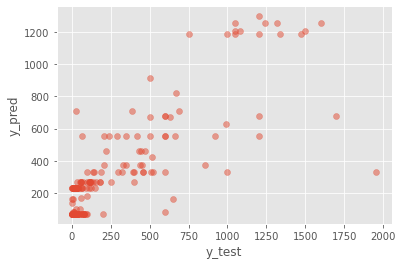

In [469]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## MSE

In [470]:
mean_squared_error(y_test,y_pred)

50327.202441768975

## RMSE

In [471]:
np.sqrt(mean_squared_error(y_test,y_pred))

224.3372515695264

### r2 score

In [472]:
r2_score(y_test,y_pred)

0.6586746731902193

### AdaBoost Regressor Model - 65.86%

#### In prediction AdaBoost Regressor Model with capacity_mw:
#### I had done this prediction by taking capacity_mw as an output variable which is continuity in nature so that why I’m using the regression technique.
#### While calculating the best random state the 370 is best state which providing the highest adjusted R2 score value for this model.
#### After calculating adjusted R2 score I used Scatter plot of AdaBoost Regressor Model,MSE,and RMSE I got r2 score of AdaBoost Regressor Model - 65.86%.¶

## Linear Regression model

In [473]:
rg = LinearRegression()
rg.fit(x_train,y_train)

LinearRegression()

In [474]:
# adjusted r2 score
rg.score(x_train,y_train)

0.6584049920490943

In [475]:
rg.score(x_test,y_test)

0.5716633339253361

In [476]:
y_pred = rg.predict(x_test)
y_pred

array([ 3.72317443e+02,  3.69636863e+02,  3.43706422e+02,  1.10310341e+02,
        1.52045143e+02, -6.77958920e+01, -2.93404837e+01,  4.02520451e+02,
        2.00963011e+01,  1.55115568e+02,  2.15472170e+02,  5.00183420e+02,
        2.31037300e+02,  3.33719721e+02,  1.14939230e+03,  1.25889447e+02,
       -1.95782675e+01,  3.23148191e+01, -2.44386880e+01,  1.86000607e+02,
        2.40431018e+01,  7.70401328e+02,  2.64844313e+02,  1.39248615e+02,
        1.34889287e+03,  4.03633781e+02,  1.03614944e+03,  1.33939136e+02,
        2.98751838e+02,  1.62144436e+02,  1.50604714e+02, -6.76412055e+01,
        1.54111756e+02,  1.43518938e+02,  3.98795677e+02,  1.50314090e+03,
        5.26609525e+02,  6.65734737e+02,  1.47022652e+02,  1.17901077e+02,
        3.75975390e+02,  3.51995007e+02,  3.50979636e+01,  1.42008601e+02,
       -9.99837884e+01,  3.12265845e+02,  1.48252298e+02,  7.70940296e+02,
        2.27184651e+02,  2.35731334e+02, -4.40503330e+01,  1.10179492e+03,
        1.50659746e+02,  

# Scatter plot of Linear Regression

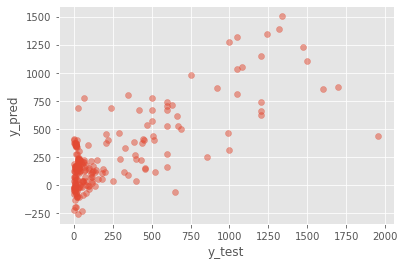

In [477]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# MSE

In [478]:
# checking mean squared error

mean_squared_error(y_test,y_pred)

63156.71417722144

# RMSE

In [479]:
np.sqrt(mean_squared_error(y_test,y_pred))

251.30999617448853

# r2_score

In [480]:
r2_score(y_test,y_pred)

0.5716633339253361

#### In prediction Linear Regression model with capacity_mw:
#### I had done this prediction by taking capacity_mw as an output variable which is continuity in nature so that why I’m using the regression technique.
#### While calculating the best random state the 370 is best state which providing the highest adjusted R2 score value for this model.
#### After calculating adjusted R2 score I used Scatter plot of Linear Regression,MSE,and RMSE I got r2 score of Linear Regression model - 57.16%.

## Random Forest Regressor Model

In [481]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [482]:
# adjusted r2 score
rf.score(x_train,y_train)

0.9659628402496142

In [483]:
rf.score(x_test,y_test)

0.7533768337422572

In [484]:
y_pred = rf.predict(x_test)
y_pred

array([  12.403     ,   20.192     ,   22.2635    ,   15.5885    ,
         18.658     ,   25.359     ,    6.2       ,  479.35044   ,
         94.744     ,   11.414     ,   20.5925    ,  714.796     ,
         53.3925    ,  391.0454    , 1296.8124    ,  298.5901    ,
         10.6115    ,   35.326     ,   17.4845    ,   73.85092756,
        109.8505    ,  661.188     ,  444.7784    ,   28.5544    ,
       1330.65      ,   91.791     , 1241.6708    ,  139.0105    ,
         28.2575    ,  125.937     ,   35.36496378,   31.021     ,
         27.756     ,  237.45448   ,   17.15296378, 1232.5       ,
        684.322     ,  469.8972    ,   35.335     ,  166.25071   ,
         14.858     ,  102.65      ,  153.98171   ,   21.862     ,
         17.9395    ,  454.94      ,   28.611     ,  624.155     ,
         26.5525    ,  471.3002    ,   47.71578267, 1251.075     ,
        320.3277    ,  134.4215    ,   30.6935    ,   37.518     ,
        111.134     ,  363.31408   , 1247.55      ,   47.503  

# Scatter plot of Random Forest Regressor Model

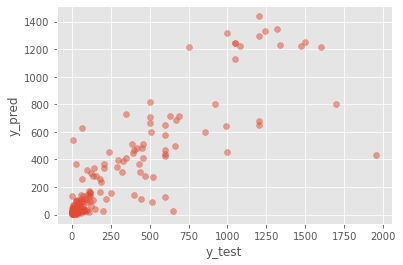

In [485]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Mse

In [486]:
# checking mean squared error

mean_squared_error(y_test,y_pred)

36363.70652916873

# RMSE

In [487]:
np.sqrt(mean_squared_error(y_test,y_pred))

190.69270182460767

# r2_score

In [488]:
r2_score(y_test,y_pred)

0.7533768337422572

#### In prediction Random Forest Regressor with capacity_mw:
#### I had done this prediction by taking capacity_mw as an output variable which is continuity in nature so that why I’m using the regression technique.
#### While calculating the best random state the 370 is best state which providing the highest adjusted R2 score value for this model.
#### After calculating adjusted R2 score I used Scatter plot of Random Forest Regressor,MSE,and RMSE I got r2 score of Random Forest Regressor model - 75.33%¶

## Decision Tree Regressor Model

In [489]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [490]:
# adjusted r2 score
dt.score(x_train,y_train)

1.0

In [491]:
dt.score(x_test,y_test)

0.6344504292030653

In [492]:
y_pred = dt.predict(x_test)
y_pred

array([9.00000e+00, 2.50000e+01, 4.50000e+00, 1.20000e+01, 2.40000e+01,
       9.00000e+00, 5.00000e+00, 7.70000e+02, 1.50000e+02, 4.00000e+00,
       1.00000e+00, 1.18800e+03, 9.18000e+01, 3.30000e+02, 1.20000e+03,
       2.80000e+02, 2.10000e+01, 3.00000e+01, 3.68000e+01, 1.00000e+02,
       1.40000e+02, 6.00000e+02, 3.00000e+02, 2.28000e+01, 1.34000e+03,
       1.28000e+01, 1.65000e+03, 1.00000e+02, 3.68000e+01, 1.55000e+02,
       5.00000e+01, 1.00000e+00, 1.60000e+01, 2.80000e+02, 4.00000e+00,
       1.20000e+03, 4.20000e+02, 3.00000e+02, 3.85000e+01, 2.50000e+02,
       1.50000e+01, 9.00000e+01, 1.50000e+02, 1.80000e+01, 9.00000e+00,
       4.40000e+02, 5.50000e+01, 1.20000e+03, 7.50000e+00, 3.30000e+02,
       5.00000e+00, 1.20000e+03, 1.95000e+02, 1.60000e+02, 1.50000e+01,
       1.50000e+01, 3.32000e+01, 3.30000e+02, 1.34000e+03, 1.05000e+01,
       3.00000e+00, 2.50000e+02, 5.00000e+01, 3.52000e+01, 5.00000e+00,
       5.00000e+00, 1.60000e+01, 1.16000e+01, 1.20000e+03, 1.000

# Scatter plot of Decision Tree Regressor Model

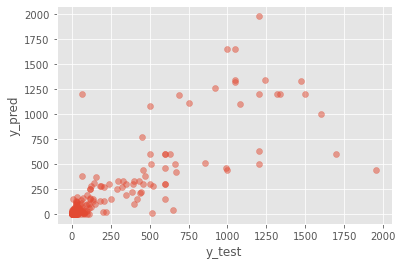

In [496]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# MSE

In [493]:
# checking mean squared error

mean_squared_error(y_test,y_pred)

53898.980846070415

# RMSE

In [494]:
np.sqrt(mean_squared_error(y_test,y_pred))

232.1615404111336

# r2 score

In [495]:
r2_score(y_test,y_pred)

0.6344504292030653

#### In prediction Decision Tree Regressor Model with capacity_mw:
#### I had done this prediction by taking capacity_mw as an output variable which is continuity in nature so that why I’m using the regression technique.
#### While calculating the best random state the 370 is best state which providing the highest adjusted R2 score value for this model.
#### After calculating adjusted R2 score I used Scatter plot of Decision Tree Regressor Model,MSE,and RMSE I got r2 score of Decision Tree Regressor Model - 63.44%

### Hyperparameter Tuning in Random Forest Regressor Model as it is best accuracy score

### Using RandomizedSearchCV method for improving the r2 score

In [497]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [498]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [499]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [500]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [501]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [502]:
prediction = rf_random.predict(x_test)

# Scatter Plot after applying Hyper Tuning in Random Forest Regressor

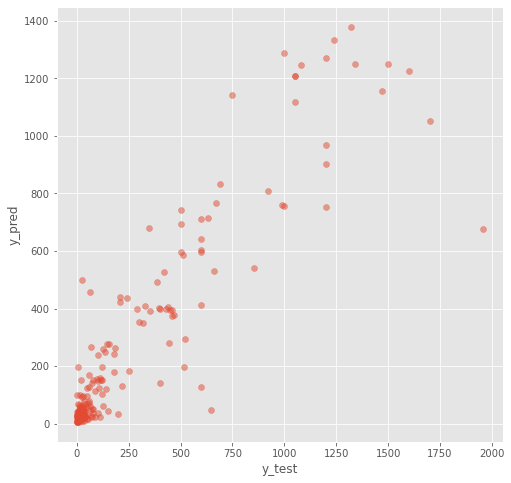

In [503]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# MSE

In [504]:
mean_squared_error(y_test,y_pred)

53898.980846070415

# RMSE

In [505]:
np.sqrt(mean_squared_error(y_test,y_pred))

232.1615404111336

# r2 score

In [506]:
r2_score(y_test,y_pred)

0.6344504292030653

#### In prediction HyperParameter Tuning of Random Forest Regressor with the help of Randomized Search Cv:
###### I had done this prediction by taking Next_Tmin as an output variable which is continuity in nature so that why I’m using the regression technique.
###### While calculating the best random state the 370 is best state which providing the highest adjusted R2 score value for this model.
###### After calculating adjusted R2 score I used Scatter plot of Random Forest Regressor After Hypertuning ,MSE,and RMSE I got r2 score of Random Forest Regressor After Hypertuning is - 63.44%.
###### Which shows that Random Forest Regressor doesnot increase it accuracy and there is no improvement in this algorithmn

## Regularization

In [507]:
# lasso regularization

lasscv = LassoCV(alphas = None,cv=10,max_iter=5000,normalize=True)

In [508]:
lasscv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=5000, normalize=True)

In [509]:
# best alphas parameters

alpha = lasscv.alpha_
alpha

0.15832245769138578

In [510]:
# now we have best parameter lets use the lasso regularization

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.15832245769138578)

In [511]:
lasso_reg.score(x_test,y_test)

0.5719704895999316

## Saving the Best Model

In [512]:
import pickle

In [513]:
# saving the Random Forest Regressor Model

filename = 'finalized_model.pickle'
pickle.dump(rf,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

#### After completing Temperature prediction with Next_Tmin Label I got Random Forest Regressor Model accuracy score high so I save Random Forest Regressor Model.

# Conclusion

### I’ll briefly discuss how I approached this problem of predicting india global power plant.
##### a) I have global power plant datastet from which I had to extract information.
##### b) I have done 2 label as the dataset speaks:
      primary_fuel - classification method
      capacity_mw - regression value
##### c) I had used pandas library to read the Dataset which provide me to explore & viualize the Data properly based on Rows & Columns.
##### d) After from all datasets, I preprocessed the data using replacing all zeros and filling all missing values.
##### e) I did exploratory data analysis on main data frame and tried to see all visualizations.
##### f) Based on visulization knowledge, I use various EDA TECHNIQUES to plot the graphs and Box Plot.
##### g) I use VIF and Standard Scalar to scaled the data and by VIF I make a relationship between Features & Features.
##### h) After from all these i split the Features & Labels into 2 parts.
##### i) On this data, I have applied our machine learning models such as 
##### Classification model
##### RandomForestClassifier,DecisionTreeClassifier,LogisticRegression,XGBClassifier,ADABoostClassifier
##### Regression model
##### Linear Regression, Random Forest Reggessor,Decision Tree Regressor and AdaBoostRegressor.

##### j) After which I found Random Forest Regressor and RandomForestClassifier has the High r2 score and accuracy best amng all the models.
##### In the modeling Building section, I have seen  Random Forest classifier has the highest Best Score (93%) with primary_fuel Label
   &

##### Random Forest Regressor is 75.339% with capacity_mw.

##### k)Based on the model scores, to predict temprature of both the labels Random Forest Regressor and Random Forest classifier seems to be the best model for this dataset.